# MANTENIMIENTO PREDICTIVO EN MOTORES DE AVIÓN

# 1- DESCRIPCIÓN

## 🛠️ Mantenimiento Predictivo en motores de avión

### 1. **Definición**

El **mantenimiento predictivo** es una metodología de gestión de mantenimiento basada en el estado real del sistema, que utiliza técnicas de **monitorización continua, análisis de datos, inteligencia artificial (IA)** y **modelos estadísticos** para anticipar la degradación o el fallo potencial de componentes críticos. A diferencia del mantenimiento preventivo (basado en tiempo o ciclos), el predictivo permite **intervenir justo antes de que ocurra una falla**, reduciendo riesgos operacionales y optimizando recursos.

---

### 2. **Principios Fundamentales**

Este tipo de mantenimiento se basa en el paradigma de **Condition-Based Maintenance (CBM)**, y su evolución hacia el **Predictive Maintenance (PdM)** implica no solo evaluar la condición actual, sino **predecir el comportamiento futuro** del componente o sistema en cuestión. Esto se logra mediante:

* **Sensorización** extensiva del avión.
* **Telemetría en tiempo real** o almacenamiento en línea de vuelo.
* **Análisis histórico y contextual** del comportamiento del sistema.
* **Modelos de pronóstico** que estiman el tiempo restante antes de una falla (Remaining Useful Life, RUL).

---

### 3. **Arquitectura Funcional del Mantenimiento Predictivo**

#### a. **Captura de Datos**

Los aviones modernos están equipados con centenares de sensores distribuidos en sistemas como:

* Motores (temperaturas de entrada y salida, vibraciones, presión de aceite, EGT)
* Sistema hidráulico (flujo, presión, fugas)
* Tren de aterrizaje (fatiga estructural, sensores de carga)
* Frenos y neumáticos (desgaste, temperatura)
* Sistema eléctrico y APU (ciclos de carga, niveles de voltaje)
* Superficies de control y actuadores (resistencia, posición, tiempo de respuesta)

#### b. **Transmisión y almacenamiento**

Los datos generados se procesan de diferentes maneras:

* **ACMS (Aircraft Condition Monitoring System)**: recopila y analiza datos abordo.
* **ACARS (Aircraft Communications Addressing and Reporting System)**: envía datos clave en vuelo.
* **FOMAX, QAR y DAR**: registradores de vuelo que almacenan datos para análisis post-vuelo.
* **Plataformas basadas en la nube**, como *Airbus Skywise*, *Boeing AnalytX* o *GE Predix*, que permiten el análisis masivo de flotas.

#### c. **Análisis Predictivo**

A través de modelos **data-driven** (IA, machine learning, redes neuronales) o **modelos físicos** (basados en ecuaciones de desgaste, fatiga o termodinámica), se predice:

* Degradación progresiva
* Patrones anómalos
* Eventos previos a fallas (precursors)

Se calcula el **RUL** y se emiten **alertas inteligentes** para programar intervenciones.

---

### 4. **Aplicaciones Específicas**

| Sistema                         | Ejemplo de Predicción                                                           |
| ------------------------------- | ------------------------------------------------------------------------------- |
| Motores  |                      Predicción de desgaste en rodamientos y eficiencia de compresores               |
| APU                             | Identificación de pérdidas de rendimiento por obstrucción o fallas electrónicas |
| Neumáticos y frenos             | Desgaste no uniforme, sobrecalentamiento o fallos hidráulicos                   |
| Superficies de control          | Fallo incipiente en actuadores electrohidráulicos (FBW)                         |
| Sistema eléctrico               | Fallo de generadores, baterías o transformadores                                |

---

### 5. **Ventajas del Mantenimiento Predictivo**

* 🔧 **Reducción de MRO no planificado** (Maintenance, Repair & Overhaul)
* 📈 **Incremento en la disponibilidad operativa**
* 💸 **Disminución de costos por mantenimiento excesivo o innecesario**
* 📉 **Reducción de AOG (Aircraft on Ground)**
* 🛡️ **Mejora de la seguridad operacional**
* 🌱 **Impacto ambiental reducido** (al evitar piezas cambiadas prematuramente)

---

### 6. **Limitaciones y Retos**

* **Alta inversión inicial**: Sensores, conectividad, software y capacitación.
* **Complejidad en la integración** de datos provenientes de distintos OEMs y subsistemas.
* **Calibración de algoritmos predictivos**: Necesidad de grandes volúmenes de datos históricos para lograr precisión.
* **Falsos positivos/negativos**: Riesgo de intervenir innecesariamente o no actuar a tiempo.
* **Regulación aeronáutica**: Las estrategias predictivas deben cumplir con normativas de la FAA, EASA, etc.

---

### 7. **Futuro del Mantenimiento Predictivo**

Con el avance de la **inteligencia artificial generativa**, el **edge computing**, y el **gemelo digital (digital twin)**, el mantenimiento predictivo evoluciona hacia una estrategia aún más autónoma, donde:

* Se podrá **simular en tiempo real el estado de cada componente**.
* Se integrarán fuentes externas como clima, rutas o historial del piloto.
* Habrá una colaboración más estrecha entre **aerolíneas, fabricantes y talleres MRO**, compartiendo datos de manera segura para beneficio común.



A continuación se usarán herramientas de programación para generar un sistema de Machine Learning que ayude a diagnosticar la necesidad de revisión de los motores del avión o la sustitución de alguna pieza del mismo.

# 2-DATOS OBTENIDOS

## 2.1- PRIMER ARCHIVO DE DATOS CSV

Se obtienen 2 archivos .csv

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Estos son todos los datos que se obtienen del primer archivo csv:

In [201]:
df= pd.read_csv('../data/raw/MANTENIMIENTO_PREDICTIVO_AVION/datos_mot.csv', delimiter=',')

df

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0        1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1        1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2        1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3        1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4        1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
...    ...    ...       ...       ...       ...     ...     ...      ...   
20626  100    196   -0.0004   -0.0003     100.0  518.67  643.49  1597.98   
20627  100    197   -0.0016   -0.0005     100.0  518.67  643.54  1604.50   
20628  100    198    0.0004    0.0000     100.0  518.67  643.42  1602.46   
20629  100    199   -0.0011    0.0003     100.0  518.67  643.23  1605.26   
20630  100    200   -0.0032   -0.0005     100.0  518.67  643.85  1600.38   

            s4     s5  ...     s12      s13      s14     s15   s16  s17   s18  \
0      1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388   
1      1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388   
2      1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388   
3      1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388   
4      1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388   
...        ...    ...  ...     ...      ...      ...     ...   ...  ...   ...   
20626  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03  397  2388   
20627  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03  395  2388   
20628  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03  398  2388   
20629  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03  395  2388   
20630  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03  396  2388   

         s19    s20      s21  
0      100.0  39.06  23.4190  
1      100.0  39.00  23.4236  
2      100.0  38.95  23.3442  
3      100.0  38.88  23.3739  
4      100.0  38.90  23.4044  
...      ...    ...      ...  
20626  100.0  38.49  22.9735  
20627  100.0  38.30  23.1594  
20628  100.0  38.44  22.9333  
20629  100.0  38.29  23.0640  
20630  100.0  38.37  23.0522  

[20631 rows x 26 columns]

Se dispone de un set de datos sobre diferentes parametros de motores de aviones. Para simplificar, los nombres de las variables estan codificados con una letra y un numero. Seguidamente se muestra una tabla donde se describe cada uno.

Los datos son de 100 motores de avion y para cada uno se dan una serie de ciclos hasta que falla.
Cada fila representa un ciclo de operación de un motor, con un total de 26 columnas numéricas (variables).



| Variable   | Inglés                         | Español                                                    |
| ---------- | ------------------------------ | ---------------------------------------------------------- |
| `id`       | Engine ID                      | ID del motor                                               |
| `cycle`    | Time cycle / operating cycle   | Ciclo de operación                                         |
| `setting1` | Operational setting 1          | Parámetro operativo 1                                      |
| `setting2` | Operational setting 2          | Parámetro operativo 2                                      |
| `setting3` | Operational setting 3          | Parámetro operativo 3                                      |
| `s1`       | Total temperature at fan inlet | Temperatura total en la entrada del ventilador             |
| `s2`       | LPC outlet temperature         | Temperatura a la salida del compresor de baja presión      |
| `s3`       | HPC outlet temperature         | Temperatura a la salida del compresor de alta presión      |
| `s4`       | LPT outlet temperature         | Temperatura a la salida de la turbina de baja presión      |
| `s5`       | Fan inlet pressure             | Presión en la entrada del ventilador                       |
| `s6`       | Bypass-duct pressure           | Presión en el conducto de derivación (bypass)              |
| `s7`       | HPC outlet pressure            | Presión a la salida del compresor de alta presión          |
| `s8`       | Physical fan speed             | Velocidad física del ventilador                            |
| `s9`       | Physical core speed            | Velocidad física del núcleo                                |
| `s10`      | Engine pressure ratio          | Relación de presión del motor                              |
| `s11`      | Static pressure at HPC outlet  | Presión estática a la salida del compresor de alta presión |
| `s12`      | Fuel flow / Ps30               | Flujo de combustible relativo a Ps30                       |
| `s13`      | Corrected fan speed            | Velocidad corregida del ventilador                         |
| `s14`      | Corrected core speed           | Velocidad corregida del núcleo                             |
| `s15`      | Bypass ratio                   | Relación de bypass                                         |
| `s16`      | Burner fuel-air ratio          | Relación combustible-aire del quemador                     |
| `s17`      | Bleed enthalpy                 | Entalpía del sangrado                                      |
| `s18`      | Demanded fan speed             | Velocidad deseada del ventilador                           |
| `s19`      | Demanded corrected core speed  | Velocidad corregida deseada del núcleo                     |
| `s20`      | HPT coolant bleed              | Flujo de refrigerante en la turbina de alta presión        |
| `s21`      | LPT coolant bleed              | Flujo de refrigerante en la turbina de baja presión        |




NOTA: El sangrado de aire (bleed air) en un motor de avión se refiere al aire extraído del compresor de un motor a reacción para diversos fines, como la presurización y climatización de la cabina, el deshielo de las alas y la operación de sistemas auxiliares. Este aire, que se toma a alta temperatura y presión, se utiliza para alimentar estos sistemas en lugar de ser utilizado directamente para la propulsión.

Para cada motor se dan diferente numero de ciclos, por ejemplo para el 1 hay 192 y para el 2 hay 287.
Existe otro set de datos con la información del ciclo en el que se produce el fallo. Se usará posteriormente para ayudar con la predicción.

## 2.2- SEGUNDO ARCHIVO DE DATOS CSV

Se extraen los datos de este segundo csv y se comprueba que en cada id, osea en cada motor, los fallos se dan en diferentes ciclos.

Este es el egundo set de datos del que se obtiene información sobre en que ciclo se da el fallos en cada motor.

In [202]:
df_fallos= pd.read_csv('../data/raw/MANTENIMIENTO_PREDICTIVO_AVION/fallos.csv', delimiter=',')

df_fallos

id  cycle
0     1    112
1     2     98
2     3     69
3     4     82
4     5     91
..  ...    ...
95   96    137
96   97     82
97   98     59
98   99    117
99  100     20

[100 rows x 2 columns]

# 2.3-UNIFICACIÓN DE LOS DATOS EN UNA UNICA TABLA

A continuación se juntan las dos tablas:

In [203]:
# Se renombra la columna cycle de la segunda tabla para no onfundirlas cuando se unan las dos tablas. 
df_fallos = df_fallos.rename(columns={'cycle': 'failure_cycle'})

# Se unen las dos tablas
df = df.merge(df_fallos, on='id', how='left')

# Se crea una columna nueva que dice si en ese ciclo hay fallo o no (0/1)
df['is_failure_cycle'] = (df['cycle'] == df['failure_cycle']).astype(int)


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20631 non-null  int64  
 1   cycle             20631 non-null  int64  
 2   setting1          20631 non-null  float64
 3   setting2          20631 non-null  float64
 4   setting3          20631 non-null  float64
 5   s1                20631 non-null  float64
 6   s2                20631 non-null  float64
 7   s3                20631 non-null  float64
 8   s4                20631 non-null  float64
 9   s5                20631 non-null  float64
 10  s6                20631 non-null  float64
 11  s7                20631 non-null  float64
 12  s8                20631 non-null  float64
 13  s9                20631 non-null  float64
 14  s10               20631 non-null  float64
 15  s11               20631 non-null  float64
 16  s12               20631 non-null  float6

Se analizan los datos y se comprueba que las variables no tinene nulos y son todas numéricas.

In [205]:
df.describe()

id         cycle      setting1      setting2  setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0   
mean      51.506568    108.807862     -0.000009      0.000002     100.0   
std       29.227633     68.880990      0.002187      0.000293       0.0   
min        1.000000      1.000000     -0.008700     -0.000600     100.0   
25%       26.000000     52.000000     -0.001500     -0.000200     100.0   
50%       52.000000    104.000000      0.000000      0.000000     100.0   
75%       77.000000    156.000000      0.001500      0.000300     100.0   
max      100.000000    362.000000      0.008700      0.000600     100.0   

             s1            s2            s3            s4            s5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

                s14           s15           s16           s17      s18  \
count  20631.000000  20631.000000  2.063100e+04  20631.000000  20631.0   
mean    8143.752722      8.442146  3.000000e-02    393.210654   2388.0   
std       19.076176      0.037505  1.387812e-17      1.548763      0.0   
min     8099.940000      8.324900  3.000000e-02    388.000000   2388.0   
25%     8133.245000      8.414900  3.000000e-02    392.000000   2388.0   
50%     8140.540000      8.438900  3.000000e-02    393.000000   2388.0   
75%     8148.310000      8.465600  3.000000e-02    394.000000   2388.0   
max     8293.720000      8.584800  3.000000e-02    400.000000   2388.0   

           s19           s20           s21  failure_cycle  is_failure_cycle  
count  20631.0  20631.000000  20631.000000   20631.000000      20631.000000  
mean     100.0     38.816271     23.289705      75.823712          0.004799  
std        0.0      0.180746      0.108251      41.947932          0.069107  
min      100.0     38.140000     22.894200       7.000000          0.000000  
25%      100.0     38.700000     23.221800      29.000000          0.000000  
50%      100.0     38.830000     23.297900      87.000000          0.000000  
75%      100.0     38.950000     23.366800     113.000000          0.000000  
max      100.0     39.430000     23.618400     145.000000          1.000000  

[8 rows x 28 columns]

# 3-CORRELACIÓN ENTRE VARIABLES

Se analizan las correlaciones entre las distintas variables. Algunas estaran directamente relacionadas al ser valor deseado y valor medido (no se eliminarán) o por ser el valor medido y ese mismo valor corregido teniendo en cuenta las condiciones ambientales (en este caso solo se mantendra la opción corregida).  

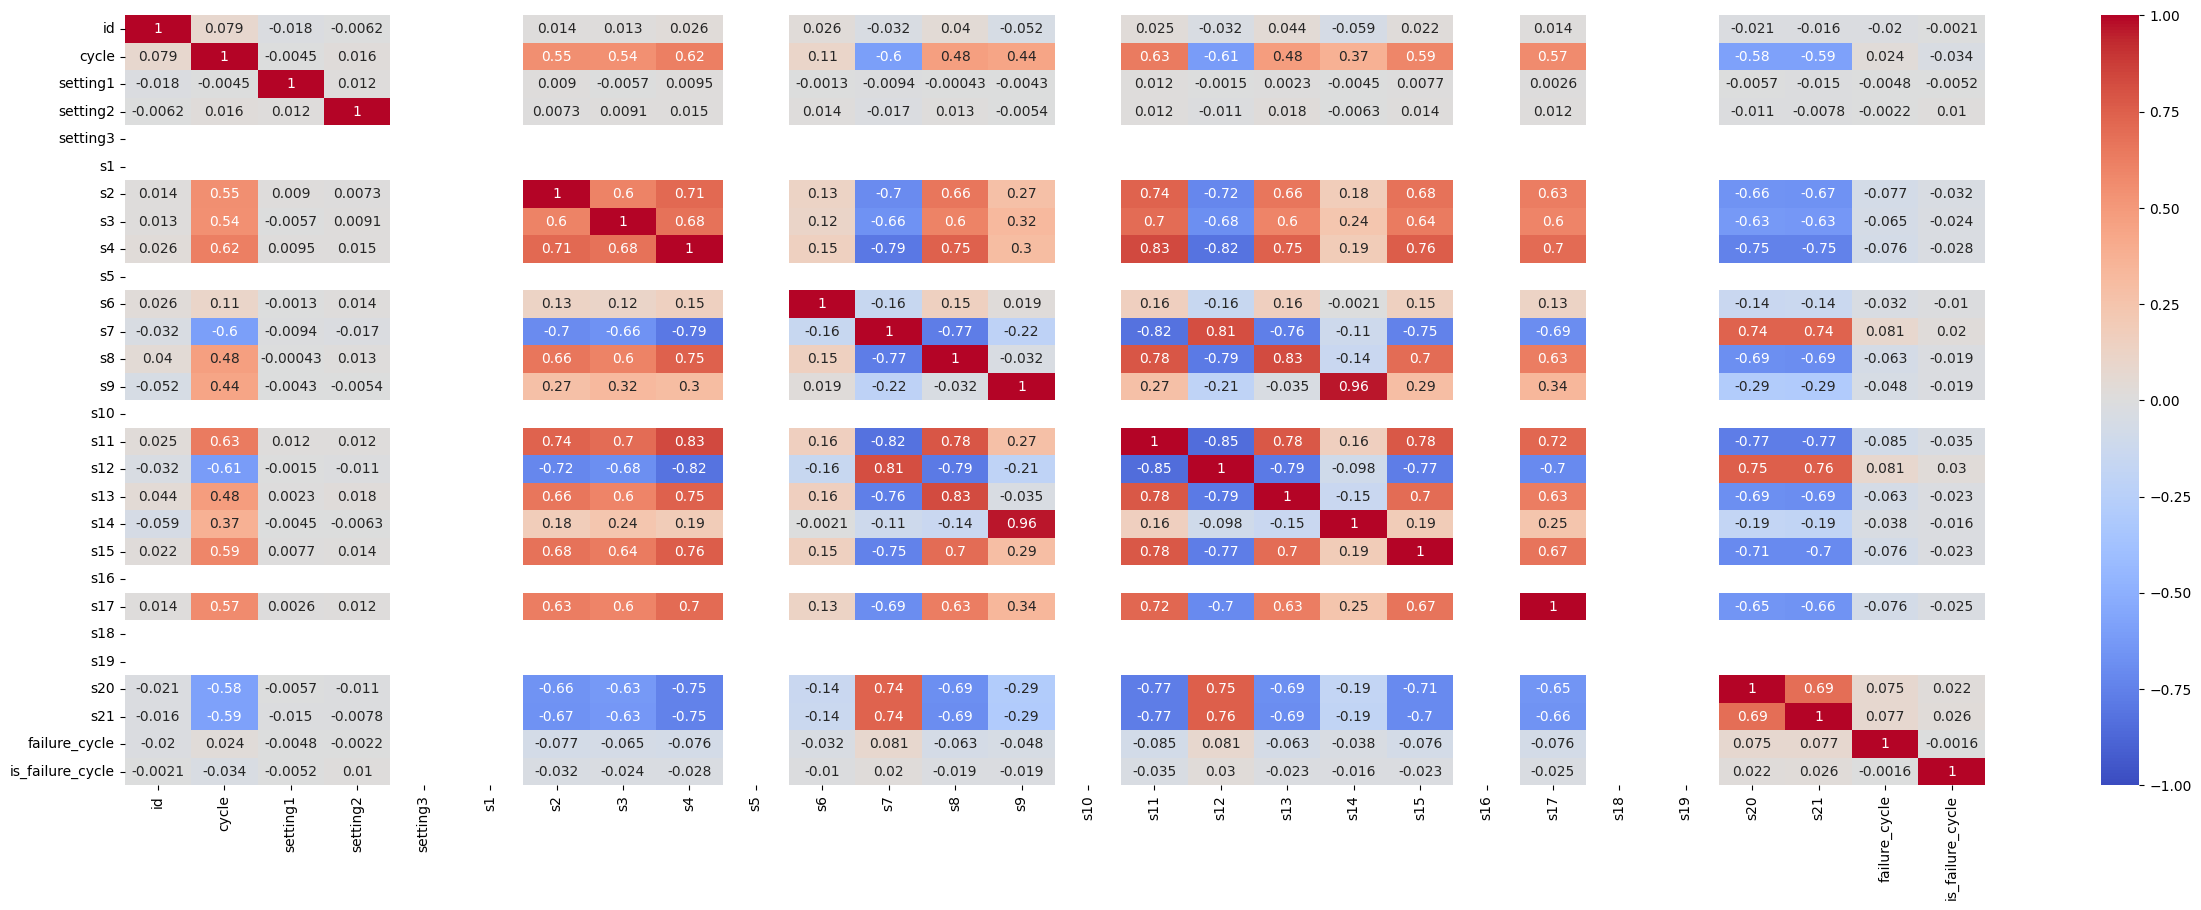

In [206]:
plt.figure(figsize=[30,10])
sns.heatmap (df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

En este Heatmap se puede observar que que existen variables que dan 0 de correlación y esto se debe a que son valores constantes. Estas variabes no sirven para hacer predicciones.


| Variable   | Inglés                         | Español                                                    |
| ---------- | ------------------------------ | ---------------------------------------------------------- |
| 
| `setting3` | Operational setting 3          | Parámetro operativo 3                                      |
| `s1`       | Total temperature at fan inlet | Temperatura total en la entrada del ventilador             |
| `s5`       | Fan inlet pressure             | Presión en la entrada del ventilador                       |
| `s10`      | Engine pressure ratio          | Relación de presión del motor                              |
| `s16`      | Burner fuel-air ratio          | Relación combustible-aire del quemador                     |
| `s18`      | Demanded fan speed             | Velocidad deseada del ventilador                           |
| `s19`      | Demanded corrected core speed  | Velocidad corregida deseada del núcleo                     |




Además se comprueba que las variables s9 y s14 tienen una correlación muy alta al ser S14 la variable S9 corregida, por lo que se eliminará la S9.
| Variable   | Inglés                         | Español                                                    |
| ---------- | ------------------------------ | ---------------------------------------------------------- |
| `s9`       | Physical core speed            | Velocidad física del núcleo                                |
| `s14`      | Corrected core speed           | Velocidad corregida del núcleo                             |





# 4- CONSULTA SOBRE VARIABLES

## 4.1- VER SOLO ID=1

In [207]:
df_id1 = df[df['id'] == 1]
df_id1

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0     1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1     1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2     1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3     1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4     1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
..   ..    ...       ...       ...       ...     ...     ...      ...   
187   1    188   -0.0067    0.0003     100.0  518.67  643.75  1602.38   
188   1    189   -0.0006    0.0002     100.0  518.67  644.18  1596.17   
189   1    190   -0.0027    0.0001     100.0  518.67  643.64  1599.22   
190   1    191   -0.0000   -0.0004     100.0  518.67  643.34  1602.36   
191   1    192    0.0009   -0.0000     100.0  518.67  643.54  1601.41   

          s4     s5  ...      s14     s15   s16  s17   s18    s19    s20  \
0    1400.60  14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1    1403.14  14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2    1404.20  14.62  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3    1401.87  14.62  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4    1406.22  14.62  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90   
..       ...    ...  ...      ...     ...   ...  ...   ...    ...    ...   
187  1422.78  14.62  ...  8117.69  8.5207  0.03  396  2388  100.0  38.51   
188  1428.01  14.62  ...  8117.51  8.5183  0.03  395  2388  100.0  38.48   
189  1425.95  14.62  ...  8112.58  8.5223  0.03  398  2388  100.0  38.49   
190  1425.77  14.62  ...  8114.61  8.5174  0.03  394  2388  100.0  38.45   
191  1427.20  14.62  ...  8110.93  8.5113  0.03  396  2388  100.0  38.48   

         s21  failure_cycle  is_failure_cycle  
0    23.4190            112                 0  
1    23.4236            112                 0  
2    23.3442            112                 0  
3    23.3739            112                 0  
4    23.4044            112                 0  
..       ...            ...               ...  
187  22.9588            112                 0  
188  23.1127            112                 0  
189  23.0675            112                 0  
190  23.1295            112                 0  
191  22.9649            112                 0  

[192 rows x 28 columns]

## 4.2- VER SOLO ID=2

In [208]:
df_id2 = df[df['id'] == 2]
df_id2

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
192   2      1   -0.0018    0.0006     100.0  518.67  641.89  1583.84   
193   2      2    0.0043   -0.0003     100.0  518.67  641.82  1587.05   
194   2      3    0.0018    0.0003     100.0  518.67  641.55  1588.32   
195   2      4    0.0035   -0.0004     100.0  518.67  641.68  1584.15   
196   2      5    0.0005    0.0004     100.0  518.67  641.73  1579.03   
..   ..    ...       ...       ...       ...     ...     ...      ...   
474   2    283    0.0046    0.0002     100.0  518.67  643.78  1602.03   
475   2    284   -0.0006    0.0001     100.0  518.67  643.91  1601.35   
476   2    285   -0.0007    0.0004     100.0  518.67  643.67  1596.84   
477   2    286   -0.0010   -0.0003     100.0  518.67  643.44  1603.63   
478   2    287   -0.0005    0.0006     100.0  518.67  643.85  1608.50   

          s4     s5  ...      s14     s15   s16  s17   s18    s19    s20  \
192  1391.28  14.62  ...  8137.72  8.3905  0.03  391  2388  100.0  38.94   
193  1393.13  14.62  ...  8131.09  8.4167  0.03  392  2388  100.0  39.06   
194  1398.96  14.62  ...  8140.58  8.3802  0.03  391  2388  100.0  39.11   
195  1396.08  14.62  ...  8140.44  8.4018  0.03  391  2388  100.0  39.13   
196  1402.52  14.62  ...  8136.67  8.3867  0.03  390  2388  100.0  39.18   
..       ...    ...  ...      ...     ...   ...  ...   ...    ...    ...   
474  1429.67  14.62  ...  8174.85  8.5199  0.03  398  2388  100.0  38.42   
475  1430.04  14.62  ...  8166.83  8.5291  0.03  395  2388  100.0  38.23   
476  1431.17  14.62  ...  8164.83  8.5242  0.03  396  2388  100.0  38.39   
477  1429.57  14.62  ...  8169.97  8.4932  0.03  395  2388  100.0  38.33   
478  1430.84  14.62  ...  8175.57  8.5365  0.03  398  2388  100.0  38.43   

         s21  failure_cycle  is_failure_cycle  
192  23.4585             98                 0  
193  23.4085             98                 0  
194  23.4250             98                 0  
195  23.5027             98                 0  
196  23.4234             98                 0  
..       ...            ...               ...  
474  23.0358             98                 0  
475  23.1196             98                 0  
476  23.1155             98                 0  
477  23.0169             98                 0  
478  23.0848             98                 0  

[287 rows x 28 columns]

## 4.3- VER SOLO LOS CICLOS DONDE SALTA LA ALARMA DE FALLO

In [209]:
df[df['is_failure_cycle'] == 1]

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
111      1    112    0.0005    0.0003     100.0  518.67  642.66  1586.46   
289      2     98   -0.0001    0.0003     100.0  518.67  641.73  1587.84   
547      3     69    0.0051   -0.0001     100.0  518.67  642.05  1581.93   
739      4     82   -0.0003    0.0004     100.0  518.67  642.66  1582.04   
937      5     91   -0.0052   -0.0001     100.0  518.67  642.40  1584.88   
...    ...    ...       ...       ...       ...     ...     ...      ...   
19688   96    137    0.0010    0.0003     100.0  518.67  642.24  1585.92   
19969   97     82   -0.0000   -0.0003     100.0  518.67  642.17  1587.36   
20148   98     59    0.0027    0.0003     100.0  518.67  642.33  1584.25   
20362   99    117    0.0004    0.0003     100.0  518.67  642.27  1592.28   
20450  100     20   -0.0009    0.0000     100.0  518.67  642.25  1589.10   

            s4     s5  ...      s14     s15   s16  s17   s18    s19    s20  \
111    1401.84  14.62  ...  8131.52  8.4445  0.03  394  2388  100.0  38.84   
289    1401.08  14.62  ...  8140.08  8.4115  0.03  391  2388  100.0  39.08   
547    1404.20  14.62  ...  8139.20  8.4404  0.03  392  2388  100.0  39.07   
739    1404.73  14.62  ...  8136.00  8.4169  0.03  392  2388  100.0  38.93   
937    1397.86  14.62  ...  8151.87  8.4312  0.03  391  2388  100.0  38.99   
...        ...    ...  ...      ...     ...   ...  ...   ...    ...    ...   
19688  1409.24  14.62  ...  8132.43  8.4793  0.03  394  2388  100.0  38.97   
19969  1405.01  14.62  ...  8136.02  8.3993  0.03  392  2388  100.0  38.86   
20148  1396.07  14.62  ...  8143.92  8.4193  0.03  393  2388  100.0  38.97   
20362  1404.82  14.62  ...  8132.91  8.4047  0.03  391  2388  100.0  38.81   
20450  1403.74  14.62  ...  8141.29  8.4159  0.03  392  2388  100.0  38.84   

           s21  failure_cycle  is_failure_cycle  
111    23.3207            112                 1  
289    23.5011             98                 1  
547    23.3595             69                 1  
739    23.2496             82                 1  
937    23.4760             91                 1  
...        ...            ...               ...  
19688  23.3395            137                 1  
19969  23.3195             82                 1  
20148  23.4885             59                 1  
20362  23.2542            117                 1  
20450  23.3421             20                 1  

[99 rows x 28 columns]

# 5- GRÁFICOS VARIABLES

Ejemplo de una grafica de una variable.

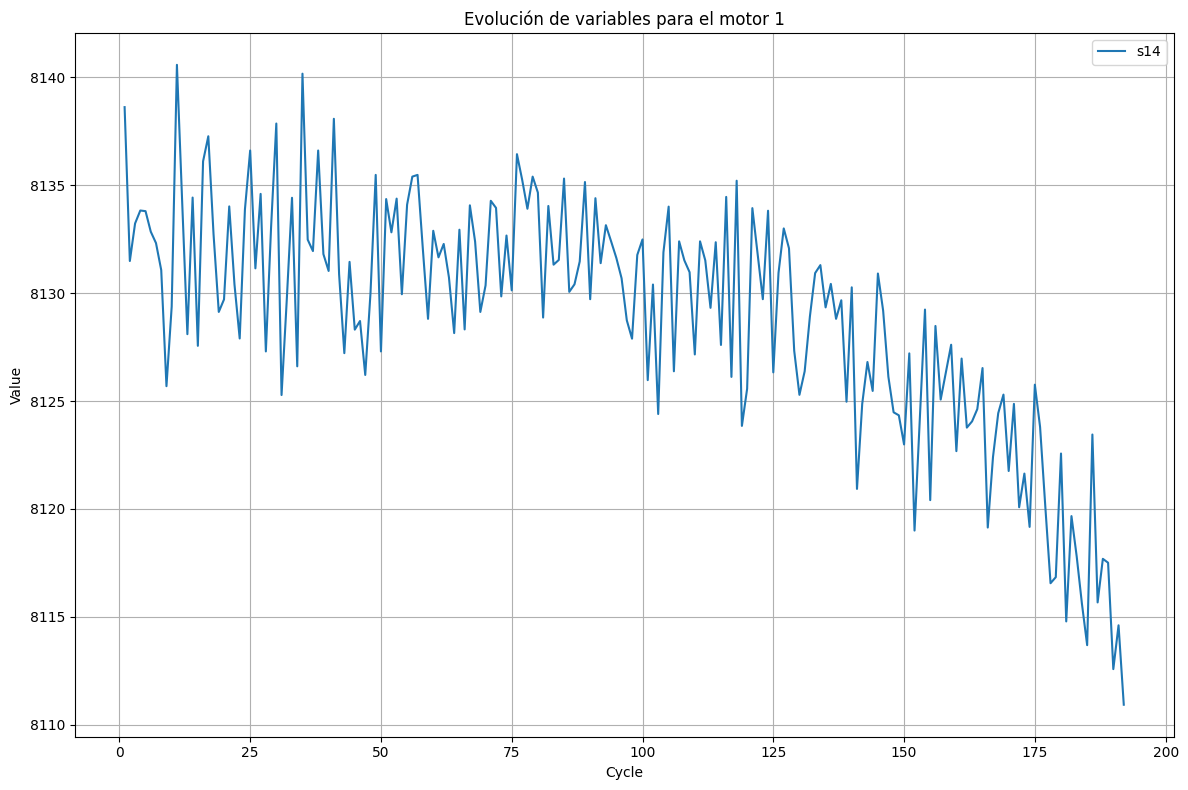

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

df_motor1 = df[df['id'] == 1]

variables = ['s14']  

plt.figure(figsize=(12, 8))

for var in variables:
    plt.plot(df_motor1['cycle'], df_motor1[var], label=var)

plt.xlabel('Cycle')
plt.ylabel('Value')
plt.title('Evolución de variables para el motor 1')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# 6-CREACIÓN DE LA TARGET DE CLASIFICACIÓN

Durante el último ciclo, el motor del avión ya se encontraba en mal estado, y antes del último ciclo realmente necesitaba mantenimiento. Por eso, predecir cuántos ciclos antes de que falle se puede detectar lo que va a pasar es muy importante.
Definir un valor demasiado alto (o temprano) puede hacer que no sea eficiente pero si es demasiado bajo (o cercano al fallo) ser que sea demasiado tarde para programar una parada para el mantenimiento predictivo.

w1: Se clasifican los ciclos cercanos a la avería con sus respectivos id como 1 en la variable objetivo failure_within_w1.
Para definir el valor de w1 se van a analizar los datos del dataset. Se elige w1=30 para predecir si el motor necesita un mantenimineto antes de que ocurra el fallo.



Para crear la target se va a crear la variable RUL: Remaining Useful Life para cada ciclo.

¿Cuantos ciclos quedan para el fallo? Así se podrá tener el dato de que valores tienen las variables X ciclos antes.
Con este dato después se podrán hacer predicciones.

In [211]:
#RUL= ciclo actual-ciclo del fallo
for i in range(1, 101):
    max_rul = df[df['id'] == i]['cycle'].max()
    df.loc[df['id'] == i, 'RUL'] = df[df['id'] == i]['cycle'].apply(lambda x: max_rul - x)



Se crean una nueva variable "label 1" que da 1 desde el valor elegido para w1. además se crea otra variable "label 2" donde se definen 3 niveles de operación.
Se recuerda que la variable RUL indica el tiempo que queda para el fallo.

label1: Variable booleana, indica si el motor va a fallar en los proximos w1 ciclos.

Si el RUL es menor o igual a w1, da un 1, y si no da un 0.


label2: Variable multiclase, indica el estado del motor. Hay tres clases:
- "Ok"  para motores con  RUL mayor que  w1, da 0
- "Moderado" para motores con RUL menor o igual que  w1 pero mayor que w0, da 1
- "Critico" para motores con RUL menor o igual que  w0,  da 2

En este caso se elige w0= 15 y w1=30




In [212]:
# Se definen w0 y w1 de la experiencia de los datos obtenidos:
#w0, w1 = 15, 30
w0=15
w1=30

# Se crean label1 y label 2:
df['label1'] = np.where(df['RUL'] <= w1, 1, 0)

df['label2'] = np.where(df['RUL'] > w1, 0, np.where((df['RUL'] <= w1) & (df['RUL'] > w0),1, 2))

In [213]:
df

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0        1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1        1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2        1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3        1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4        1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
...    ...    ...       ...       ...       ...     ...     ...      ...   
20626  100    196   -0.0004   -0.0003     100.0  518.67  643.49  1597.98   
20627  100    197   -0.0016   -0.0005     100.0  518.67  643.54  1604.50   
20628  100    198    0.0004    0.0000     100.0  518.67  643.42  1602.46   
20629  100    199   -0.0011    0.0003     100.0  518.67  643.23  1605.26   
20630  100    200   -0.0032   -0.0005     100.0  518.67  643.85  1600.38   

            s4     s5  ...  s17   s18    s19    s20      s21  failure_cycle  \
0      1400.60  14.62  ...  392  2388  100.0  39.06  23.4190            112   
1      1403.14  14.62  ...  392  2388  100.0  39.00  23.4236            112   
2      1404.20  14.62  ...  390  2388  100.0  38.95  23.3442            112   
3      1401.87  14.62  ...  392  2388  100.0  38.88  23.3739            112   
4      1406.22  14.62  ...  393  2388  100.0  38.90  23.4044            112   
...        ...    ...  ...  ...   ...    ...    ...      ...            ...   
20626  1428.63  14.62  ...  397  2388  100.0  38.49  22.9735             20   
20627  1433.58  14.62  ...  395  2388  100.0  38.30  23.1594             20   
20628  1428.18  14.62  ...  398  2388  100.0  38.44  22.9333             20   
20629  1426.53  14.62  ...  395  2388  100.0  38.29  23.0640             20   
20630  1432.14  14.62  ...  396  2388  100.0  38.37  23.0522             20   

       is_failure_cycle    RUL  label1  label2  
0                     0  191.0       0       0  
1                     0  190.0       0       0  
2                     0  189.0       0       0  
3                     0  188.0       0       0  
4                     0  187.0       0       0  
...                 ...    ...     ...     ...  
20626                 0    4.0       1       2  
20627                 0    3.0       1       2  
20628                 0    2.0       1       2  
20629                 0    1.0       1       2  
20630                 0    0.0       1       2  

[20631 rows x 31 columns]

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20631 non-null  int64  
 1   cycle             20631 non-null  int64  
 2   setting1          20631 non-null  float64
 3   setting2          20631 non-null  float64
 4   setting3          20631 non-null  float64
 5   s1                20631 non-null  float64
 6   s2                20631 non-null  float64
 7   s3                20631 non-null  float64
 8   s4                20631 non-null  float64
 9   s5                20631 non-null  float64
 10  s6                20631 non-null  float64
 11  s7                20631 non-null  float64
 12  s8                20631 non-null  float64
 13  s9                20631 non-null  float64
 14  s10               20631 non-null  float64
 15  s11               20631 non-null  float64
 16  s12               20631 non-null  float6

Se ha incrementado a 31 el numero de variables de la tabla, siendo las posibles Target RUL, label1 y label2. SE estudiará cual es la más adecuada para hacer predicciones más valiosas.

# 7- ANALISIS DE LOS DATOS CON LAS POSIBLES TARGET

## 7.1- MOTOR ID=1 SIN AVISOS DE POSIBLE FALLO (label1=0, label2=0)

In [218]:
df_id1_ok = df[(df['id'] == 1) & (df['label1'] == 0)& (df['label2'] == 0)]
df_id1_ok

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0     1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1     1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2     1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3     1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4     1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
..   ..    ...       ...       ...       ...     ...     ...      ...   
156   1    157   -0.0018    0.0002     100.0  518.67  642.20  1598.04   
157   1    158   -0.0023    0.0001     100.0  518.67  642.88  1596.82   
158   1    159   -0.0006    0.0001     100.0  518.67  642.89  1589.54   
159   1    160   -0.0006   -0.0004     100.0  518.67  643.45  1590.65   
160   1    161    0.0008    0.0001     100.0  518.67  643.00  1594.20   

          s4     s5  ...  s17   s18    s19    s20      s21  failure_cycle  \
0    1400.60  14.62  ...  392  2388  100.0  39.06  23.4190            112   
1    1403.14  14.62  ...  392  2388  100.0  39.00  23.4236            112   
2    1404.20  14.62  ...  390  2388  100.0  38.95  23.3442            112   
3    1401.87  14.62  ...  392  2388  100.0  38.88  23.3739            112   
4    1406.22  14.62  ...  393  2388  100.0  38.90  23.4044            112   
..       ...    ...  ...  ...   ...    ...    ...      ...            ...   
156  1412.47  14.62  ...  392  2388  100.0  38.67  23.2354            112   
157  1410.09  14.62  ...  394  2388  100.0  38.75  23.2894            112   
158  1420.37  14.62  ...  394  2388  100.0  38.76  23.2530            112   
159  1418.08  14.62  ...  396  2388  100.0  38.52  23.2817            112   
160  1417.31  14.62  ...  394  2388  100.0  38.66  23.2962            112   

     is_failure_cycle    RUL  label1  label2  
0                   0  191.0       0       0  
1                   0  190.0       0       0  
2                   0  189.0       0       0  
3                   0  188.0       0       0  
4                   0  187.0       0       0  
..                ...    ...     ...     ...  
156                 0   35.0       0       0  
157                 0   34.0       0       0  
158                 0   33.0       0       0  
159                 0   32.0       0       0  
160                 0   31.0       0       0  

[161 rows x 31 columns]

Los ciclos OK son la mayoría. 

label1: Variable booleana, indica si el motor va a fallar en los proximos w1 ciclos.

Si el RUL es menor o igual a w1, da un 1, y si no da un 0.


label2: Variable multiclase, indica el estado del motor. Hay tres clases:
- "Ok"  para motores con  RUL mayor que  w1, da 0
- "Moderado" para motores con RUL menor o igual que  w1 pero mayor que w0, da 1
- "Critico" para motores con RUL menor o igual que  w0,  da 2

En este caso se elige w0= 15 y w1=30

In [219]:
df_id1_moderado = df[(df['id'] == 1) & (df['label1'] == 1)& (df['label2'] == 1)]
df_id1_moderado

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
161   1    162   -0.0005    0.0004     100.0  518.67  643.15  1592.22   
162   1    163    0.0003   -0.0004     100.0  518.67  642.85  1600.54   
163   1    164    0.0005   -0.0002     100.0  518.67  643.17  1598.96   
164   1    165    0.0010    0.0004     100.0  518.67  642.76  1597.03   
165   1    166   -0.0022   -0.0003     100.0  518.67  643.34  1596.72   
166   1    167    0.0012    0.0003     100.0  518.67  643.02  1593.83   
167   1    168   -0.0043    0.0002     100.0  518.67  642.68  1591.19   
168   1    169   -0.0017    0.0004     100.0  518.67  643.20  1590.16   
169   1    170   -0.0017   -0.0002     100.0  518.67  642.92  1592.71   
170   1    171    0.0004   -0.0003     100.0  518.67  643.26  1592.06   
171   1    172   -0.0014   -0.0003     100.0  518.67  643.33  1591.71   
172   1    173   -0.0032    0.0002     100.0  518.67  642.97  1590.69   
173   1    174   -0.0001   -0.0002     100.0  518.67  642.64  1599.81   
174   1    175    0.0001    0.0002     100.0  518.67  643.61  1603.29   
175   1    176   -0.0020   -0.0003     100.0  518.67  642.86  1592.27   

          s4     s5  ...  s17   s18    s19    s20      s21  failure_cycle  \
161  1423.48  14.62  ...  394  2388  100.0  38.78  23.1538            112   
162  1421.09  14.62  ...  393  2388  100.0  38.65  23.1419            112   
163  1416.76  14.62  ...  394  2388  100.0  38.62  23.1761            112   
164  1408.09  14.62  ...  393  2388  100.0  38.59  23.2129            112   
165  1422.37  14.62  ...  395  2388  100.0  38.62  23.1450            112   
166  1414.72  14.62  ...  394  2388  100.0  38.77  23.3011            112   
167  1415.70  14.62  ...  393  2388  100.0  38.76  23.2770            112   
168  1418.05  14.62  ...  394  2388  100.0  38.58  23.1870            112   
169  1417.41  14.62  ...  395  2388  100.0  38.66  23.1615            112   
170  1414.99  14.62  ...  395  2388  100.0  38.68  23.2444            112   
171  1413.73  14.62  ...  393  2388  100.0  38.65  23.1585            112   
172  1425.27  14.62  ...  395  2388  100.0  38.59  23.1789            112   
173  1422.58  14.62  ...  393  2388  100.0  38.57  23.0357            112   
174  1422.52  14.62  ...  394  2388  100.0  38.58  23.1573            112   
175  1422.73  14.62  ...  394  2388  100.0  38.72  23.2491            112   

     is_failure_cycle   RUL  label1  label2  
161                 0  30.0       1       1  
162                 0  29.0       1       1  
163                 0  28.0       1       1  
164                 0  27.0       1       1  
165                 0  26.0       1       1  
166                 0  25.0       1       1  
167                 0  24.0       1       1  
168                 0  23.0       1       1  
169                 0  22.0       1       1  
170                 0  21.0       1       1  
171                 0  20.0       1       1  
172                 0  19.0       1       1  
173                 0  18.0       1       1  
174                 0  17.0       1       1  
175                 0  16.0       1       1  

[15 rows x 31 columns]

In [220]:
df_id1_critico = df[(df['id'] == 1) & (df['label1'] == 1)& (df['label2'] == 2)]
df_id1_critico

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
176   1    177   -0.0038   -0.0003     100.0  518.67  643.79  1602.02   
177   1    178   -0.0001    0.0002     100.0  518.67  643.38  1605.33   
178   1    179    0.0023   -0.0003     100.0  518.67  642.86  1592.56   
179   1    180   -0.0024    0.0000     100.0  518.67  643.58  1599.87   
180   1    181   -0.0006    0.0005     100.0  518.67  643.44  1596.71   
181   1    182   -0.0010    0.0003     100.0  518.67  644.21  1602.08   
182   1    183    0.0001    0.0001     100.0  518.67  643.24  1597.23   
183   1    184    0.0004    0.0003     100.0  518.67  644.07  1605.44   
184   1    185    0.0008    0.0001     100.0  518.67  643.80  1603.46   
185   1    186    0.0027   -0.0003     100.0  518.67  643.51  1595.16   
186   1    187   -0.0047   -0.0000     100.0  518.67  643.32  1592.10   
187   1    188   -0.0067    0.0003     100.0  518.67  643.75  1602.38   
188   1    189   -0.0006    0.0002     100.0  518.67  644.18  1596.17   
189   1    190   -0.0027    0.0001     100.0  518.67  643.64  1599.22   
190   1    191   -0.0000   -0.0004     100.0  518.67  643.34  1602.36   
191   1    192    0.0009   -0.0000     100.0  518.67  643.54  1601.41   

          s4     s5  ...  s17   s18    s19    s20      s21  failure_cycle  \
176  1423.99  14.62  ...  396  2388  100.0  38.63  23.1673            112   
177  1424.65  14.62  ...  395  2388  100.0  38.65  23.1770            112   
178  1429.45  14.62  ...  395  2388  100.0  38.77  23.1888            112   
179  1417.14  14.62  ...  395  2388  100.0  38.86  23.0070            112   
180  1420.64  14.62  ...  397  2388  100.0  38.34  23.1652            112   
181  1426.62  14.62  ...  397  2388  100.0  38.43  23.1787            112   
182  1419.03  14.62  ...  396  2388  100.0  38.56  23.1302            112   
183  1432.52  14.62  ...  395  2388  100.0  38.43  23.0146            112   
184  1424.40  14.62  ...  395  2388  100.0  38.51  23.0700            112   
185  1426.30  14.62  ...  397  2388  100.0  38.47  23.0564            112   
186  1427.27  14.62  ...  396  2388  100.0  38.42  23.0822            112   
187  1422.78  14.62  ...  396  2388  100.0  38.51  22.9588            112   
188  1428.01  14.62  ...  395  2388  100.0  38.48  23.1127            112   
189  1425.95  14.62  ...  398  2388  100.0  38.49  23.0675            112   
190  1425.77  14.62  ...  394  2388  100.0  38.45  23.1295            112   
191  1427.20  14.62  ...  396  2388  100.0  38.48  22.9649            112   

     is_failure_cycle   RUL  label1  label2  
176                 0  15.0       1       2  
177                 0  14.0       1       2  
178                 0  13.0       1       2  
179                 0  12.0       1       2  
180                 0  11.0       1       2  
181                 0  10.0       1       2  
182                 0   9.0       1       2  
183                 0   8.0       1       2  
184                 0   7.0       1       2  
185                 0   6.0       1       2  
186                 0   5.0       1       2  
187                 0   4.0       1       2  
188                 0   3.0       1       2  
189                 0   2.0       1       2  
190                 0   1.0       1       2  
191                 0   0.0       1       2  

[16 rows x 31 columns]

# 8-NORMALIZACIÓN DE LOS DATOS

In [131]:
from sklearn import preprocessing

In [132]:
# Columnas a excluir en la normalización
var_excl = ['id', 'cycle', 'failure_cycle', 'is_failure_cycle', 'RUL', 'label1', 'label2']

# Se normaliza
normalizar = df.select_dtypes(include='number').columns.difference(var_excl)

In [133]:
df_norma = df.copy()

In [134]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norma[normalizar] = scaler.fit_transform(df[normalizar])

In [135]:
df_norma

id  cycle  setting1  setting2  setting3   s1        s2        s3  \
0        1      1  0.459770  0.166667       0.0  0.0  0.183735  0.406802   
1        1      2  0.609195  0.250000       0.0  0.0  0.283133  0.453019   
2        1      3  0.252874  0.750000       0.0  0.0  0.343373  0.369523   
3        1      4  0.540230  0.500000       0.0  0.0  0.343373  0.256159   
4        1      5  0.390805  0.333333       0.0  0.0  0.349398  0.257467   
...    ...    ...       ...       ...       ...  ...       ...       ...   
20626  100    196  0.477011  0.250000       0.0  0.0  0.686747  0.587312   
20627  100    197  0.408046  0.083333       0.0  0.0  0.701807  0.729453   
20628  100    198  0.522989  0.500000       0.0  0.0  0.665663  0.684979   
20629  100    199  0.436782  0.750000       0.0  0.0  0.608434  0.746021   
20630  100    200  0.316092  0.083333       0.0  0.0  0.795181  0.639634   

             s4   s5  ...       s17  s18  s19       s20       s21  \
0      0.309757  0.0  ...  0.333333  0.0  0.0  0.713178  0.724662   
1      0.352633  0.0  ...  0.333333  0.0  0.0  0.666667  0.731014   
2      0.370527  0.0  ...  0.166667  0.0  0.0  0.627907  0.621375   
3      0.331195  0.0  ...  0.333333  0.0  0.0  0.573643  0.662386   
4      0.404625  0.0  ...  0.416667  0.0  0.0  0.589147  0.704502   
...         ...  ...  ...       ...  ...  ...       ...       ...   
20626  0.782917  0.0  ...  0.750000  0.0  0.0  0.271318  0.109500   
20627  0.866475  0.0  ...  0.583333  0.0  0.0  0.124031  0.366197   
20628  0.775321  0.0  ...  0.833333  0.0  0.0  0.232558  0.053991   
20629  0.747468  0.0  ...  0.583333  0.0  0.0  0.116279  0.234466   
20630  0.842167  0.0  ...  0.666667  0.0  0.0  0.178295  0.218172   

       failure_cycle  is_failure_cycle    RUL  label1  label2  
0                112                 0  191.0       0       0  
1                112                 0  190.0       0       0  
2                112                 0  189.0       0       0  
3                112                 0  188.0       0       0  
4                112                 0  187.0       0       0  
...              ...               ...    ...     ...     ...  
20626             20                 0    4.0       1       2  
20627             20                 0    3.0       1       2  
20628             20                 0    2.0       1       2  
20629             20                 0    1.0       1       2  
20630             20                 0    0.0       1       2  

[20631 rows x 31 columns]

Se guardan los datos normalizados en un nuevo archivo CSV

In [223]:
df_norma.to_csv("../data/processed/datos_normalizados.csv", index=False)

Una vez se tienen los datos normalizados se hace un grafico para ver la evolución de las variables del motor 1.

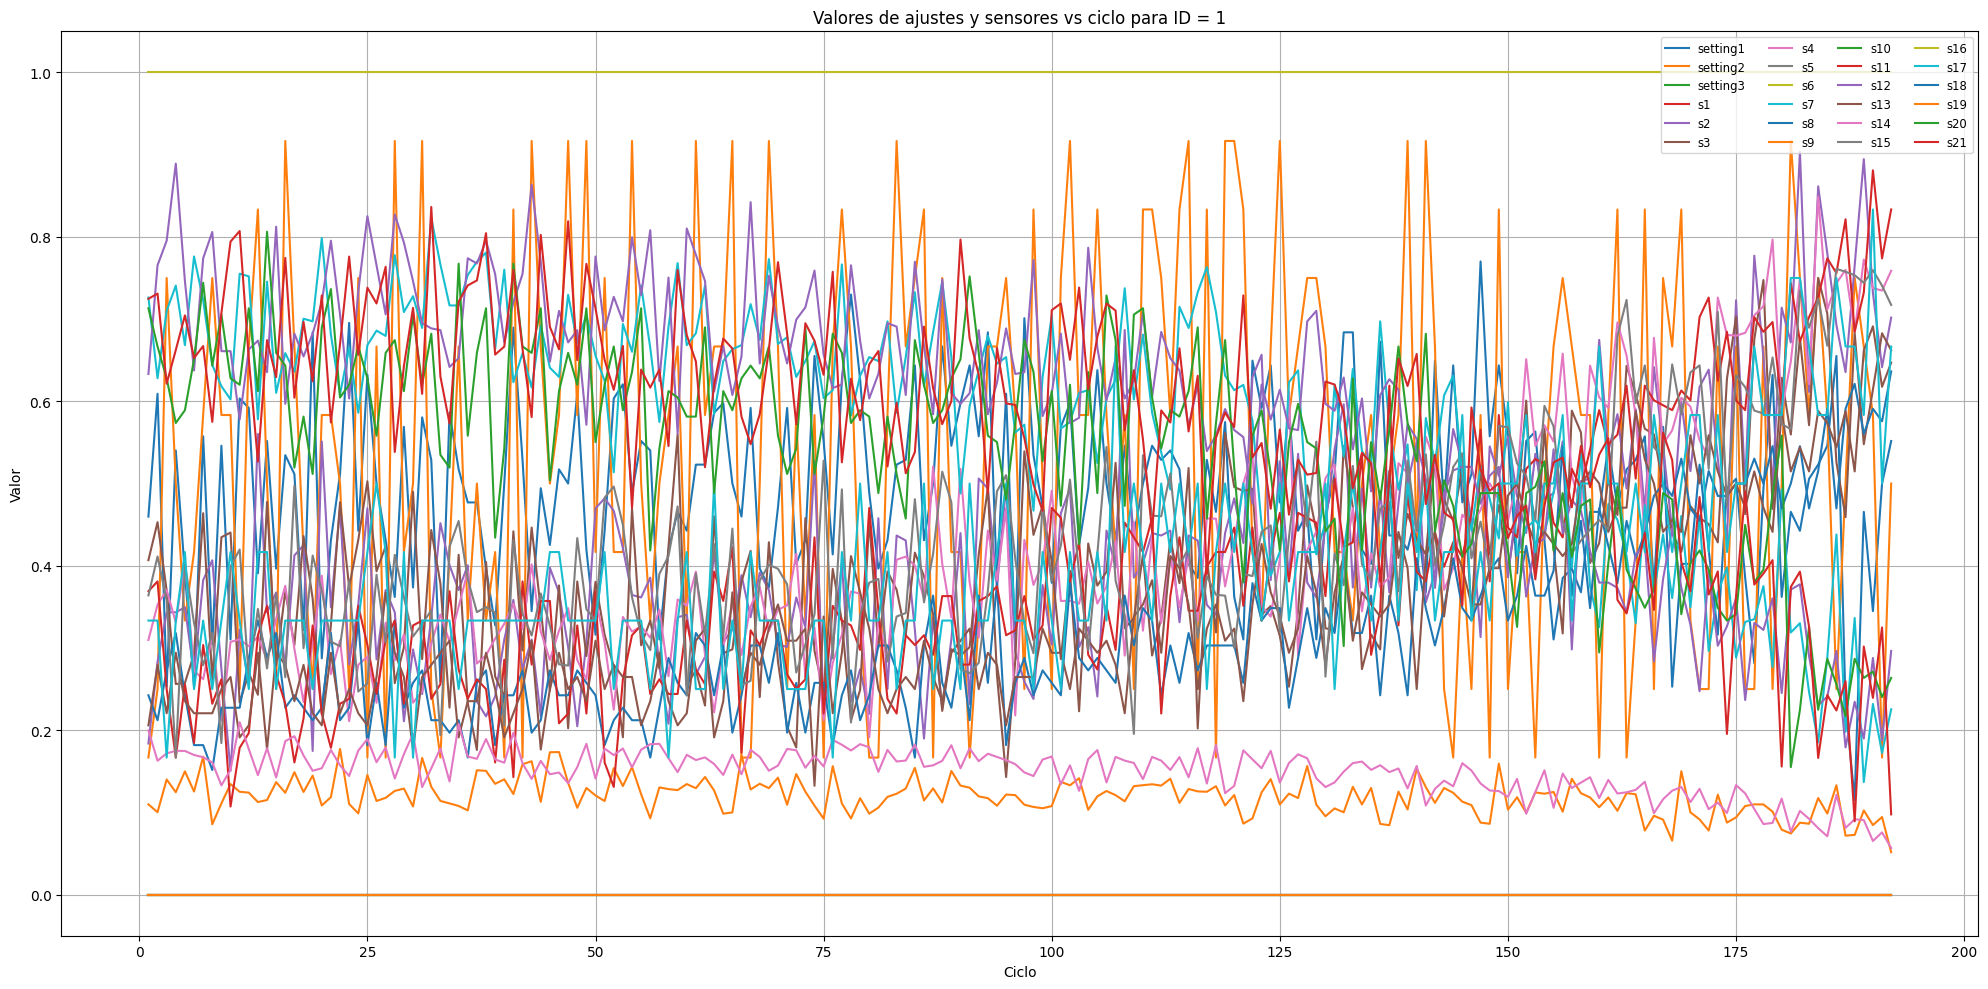

In [224]:
import pandas as pd
import matplotlib.pyplot as plt


cols_names = [
    'id', 'cycle',
    'setting1', 'setting2', 'setting3',
    's1','s2','s3','s4','s5','s6',
    's7','s8','s9','s10','s11','s12',
    's13','s14','s15','s16','s17','s18',
    's19','s20','s21',
    'failure_cycle','is_failure_cycle','RUL','label1','label2'
]

df_norma.columns = cols_names

# Filtrar solo el motor con id = 1
df1 = df_norma[df_norma['id'] == 1]

# Seleccionar las variables a graficar (ajustes + sensores)
y_cols = cols_names[2:26] 

# Graficar todas las series contra 'cycle'
plt.figure(figsize=(20, 10))
for col in y_cols:
    plt.plot(df1['cycle'], df1[col], label=col)

plt.title('Valores de ajustes y sensores vs ciclo para ID = 1')
plt.xlabel('Ciclo')
plt.ylabel('Valor')
plt.grid(True)
plt.legend(loc='upper right', ncol=4, fontsize='small')
plt.tight_layout()
plt.show()


En el gráfico se puede observar que hay variables que comienzan a subir y otras a bajar desde ciclos anteriores al fallo. En este caso, en el motor 1, se conoce que el fallo se produce en el ciclo 112.

En el ciclo 112-30= 82 ya se pueden ver variables indicando tendencia de subida o bajada. Este es el ciclo que se ha definido para la detección del posible futuro fallo.

Otros dos ejemplos con otros dos motores:

Motor 2

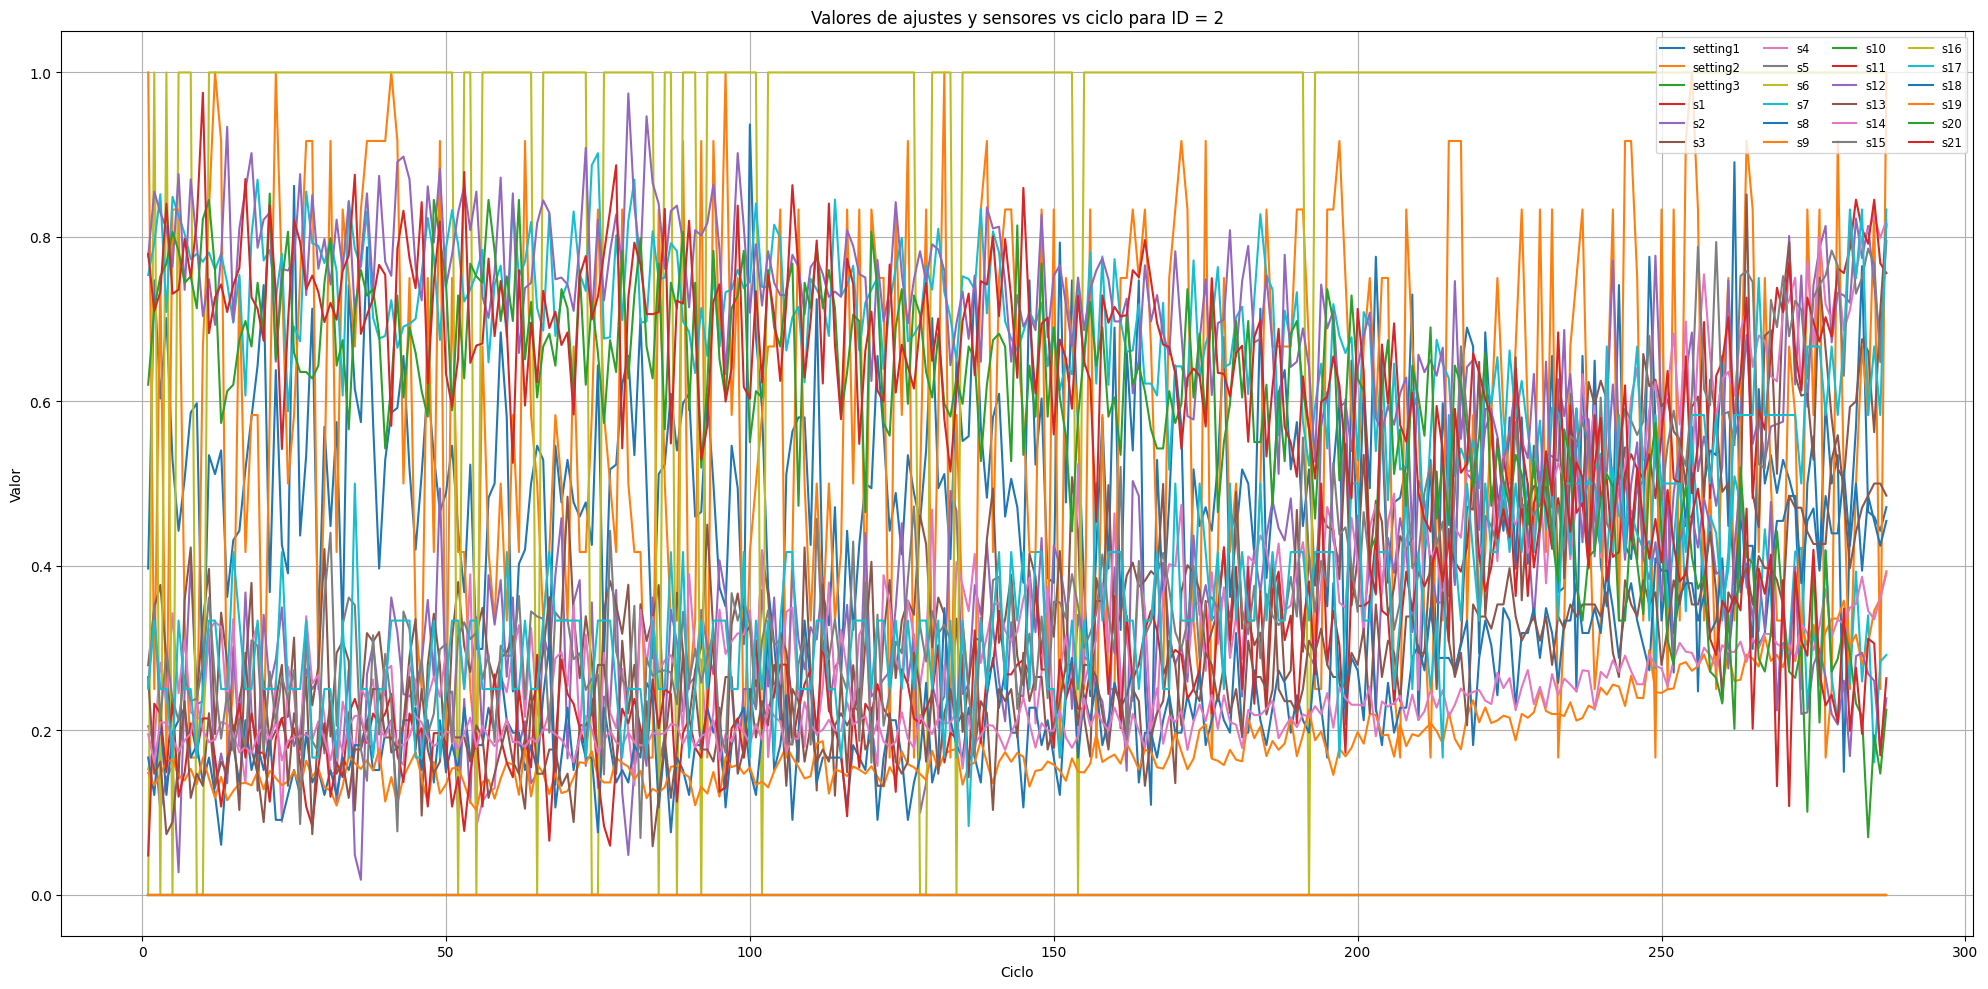

In [150]:

# Filtrar solo el motor con id = 1
df2 = df_norma[df_norma['id'] == 2]

# Seleccionar las variables a graficar (ajustes + sensores)
y_cols = cols_names[2:26] 

# Graficar todas las series contra 'cycle'
plt.figure(figsize=(20, 10))
for col in y_cols:
    plt.plot(df2['cycle'], df2[col], label=col)

plt.title('Valores de ajustes y sensores vs ciclo para ID = 2')
plt.xlabel('Ciclo')
plt.ylabel('Valor')
plt.grid(True)
plt.legend(loc='upper right', ncol=4, fontsize='small')
plt.tight_layout()
plt.show()

98-30= 68

Motor 3

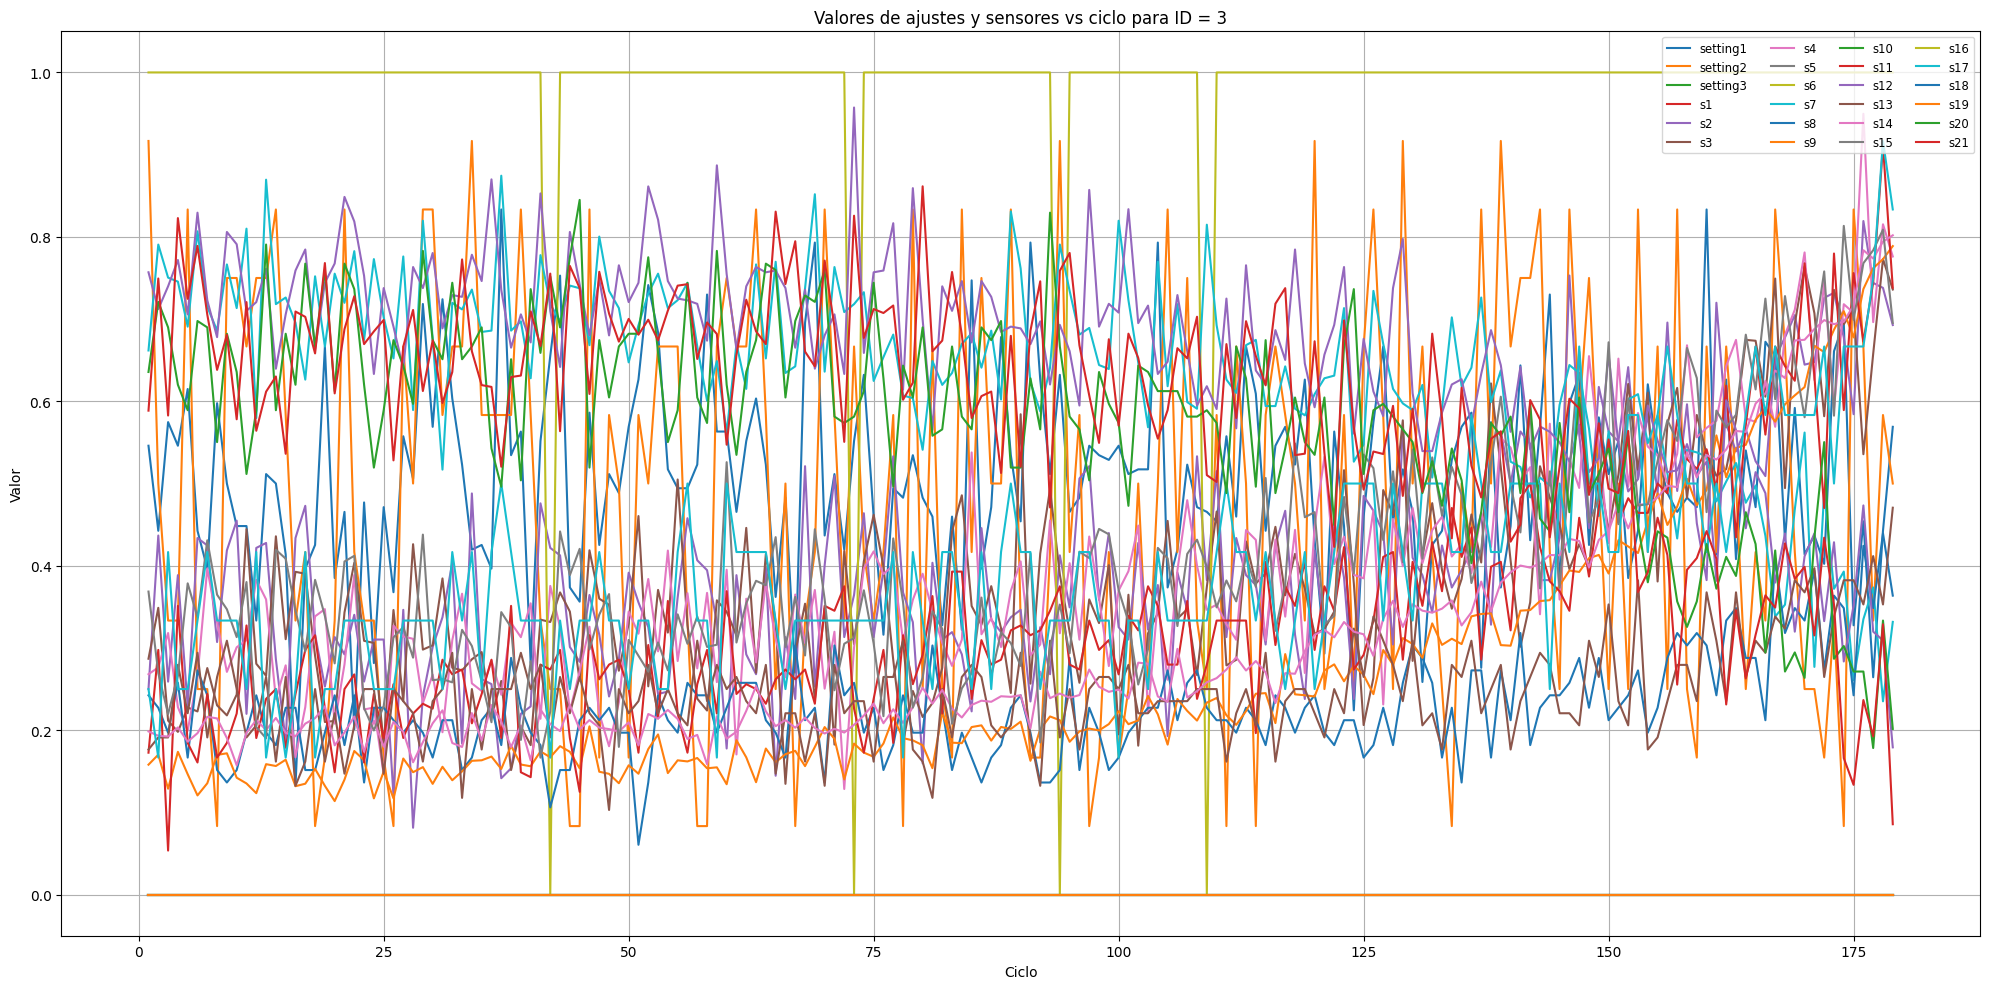

In [152]:


# Filtrar solo el motor con id = 1
df3 = df_norma[df_norma['id'] == 3]
# Seleccionar las variables a graficar (ajustes + sensores)
y_cols = cols_names[2:26] 

# Graficar todas las series contra 'cycle'
plt.figure(figsize=(20, 10))
for col in y_cols:
    plt.plot(df3['cycle'], df3[col], label=col)

plt.title('Valores de ajustes y sensores vs ciclo para ID = 3')
plt.xlabel('Ciclo')
plt.ylabel('Valor')
plt.grid(True)
plt.legend(loc='upper right', ncol=4, fontsize='small')
plt.tight_layout()
plt.show()

69-30=39

Motor 95

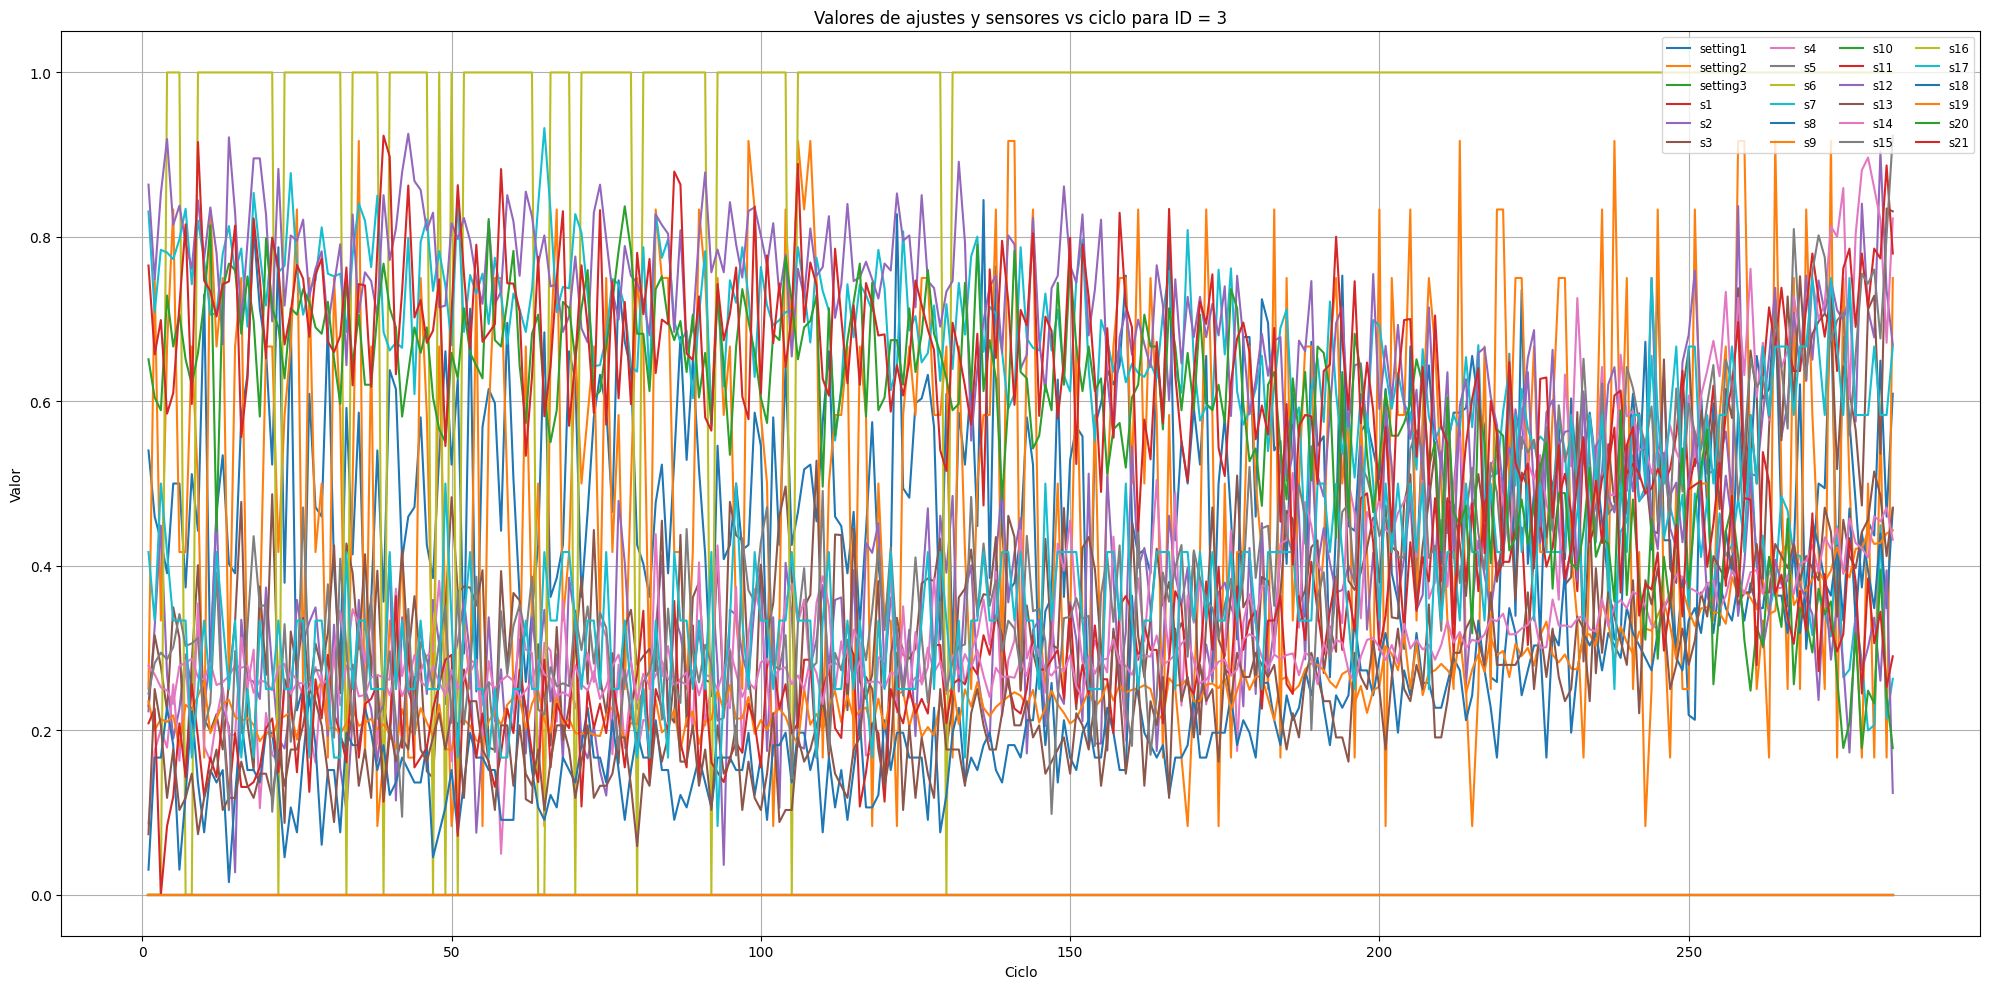

In [153]:

# Filtrar solo el motor con id = 1
df95 = df_norma[df_norma['id'] == 95]
# Seleccionar las variables a graficar (ajustes + sensores)
y_cols = cols_names[2:26] 

# Graficar todas las series contra 'cycle'
plt.figure(figsize=(20, 10))
for col in y_cols:
    plt.plot(df95['cycle'], df95[col], label=col)

plt.title('Valores de ajustes y sensores vs ciclo para ID = 3')
plt.xlabel('Ciclo')
plt.ylabel('Valor')
plt.grid(True)
plt.legend(loc='upper right', ncol=4, fontsize='small')
plt.tight_layout()
plt.show()

137-30= 107

# 9-LIMPIEZA DE DATOS

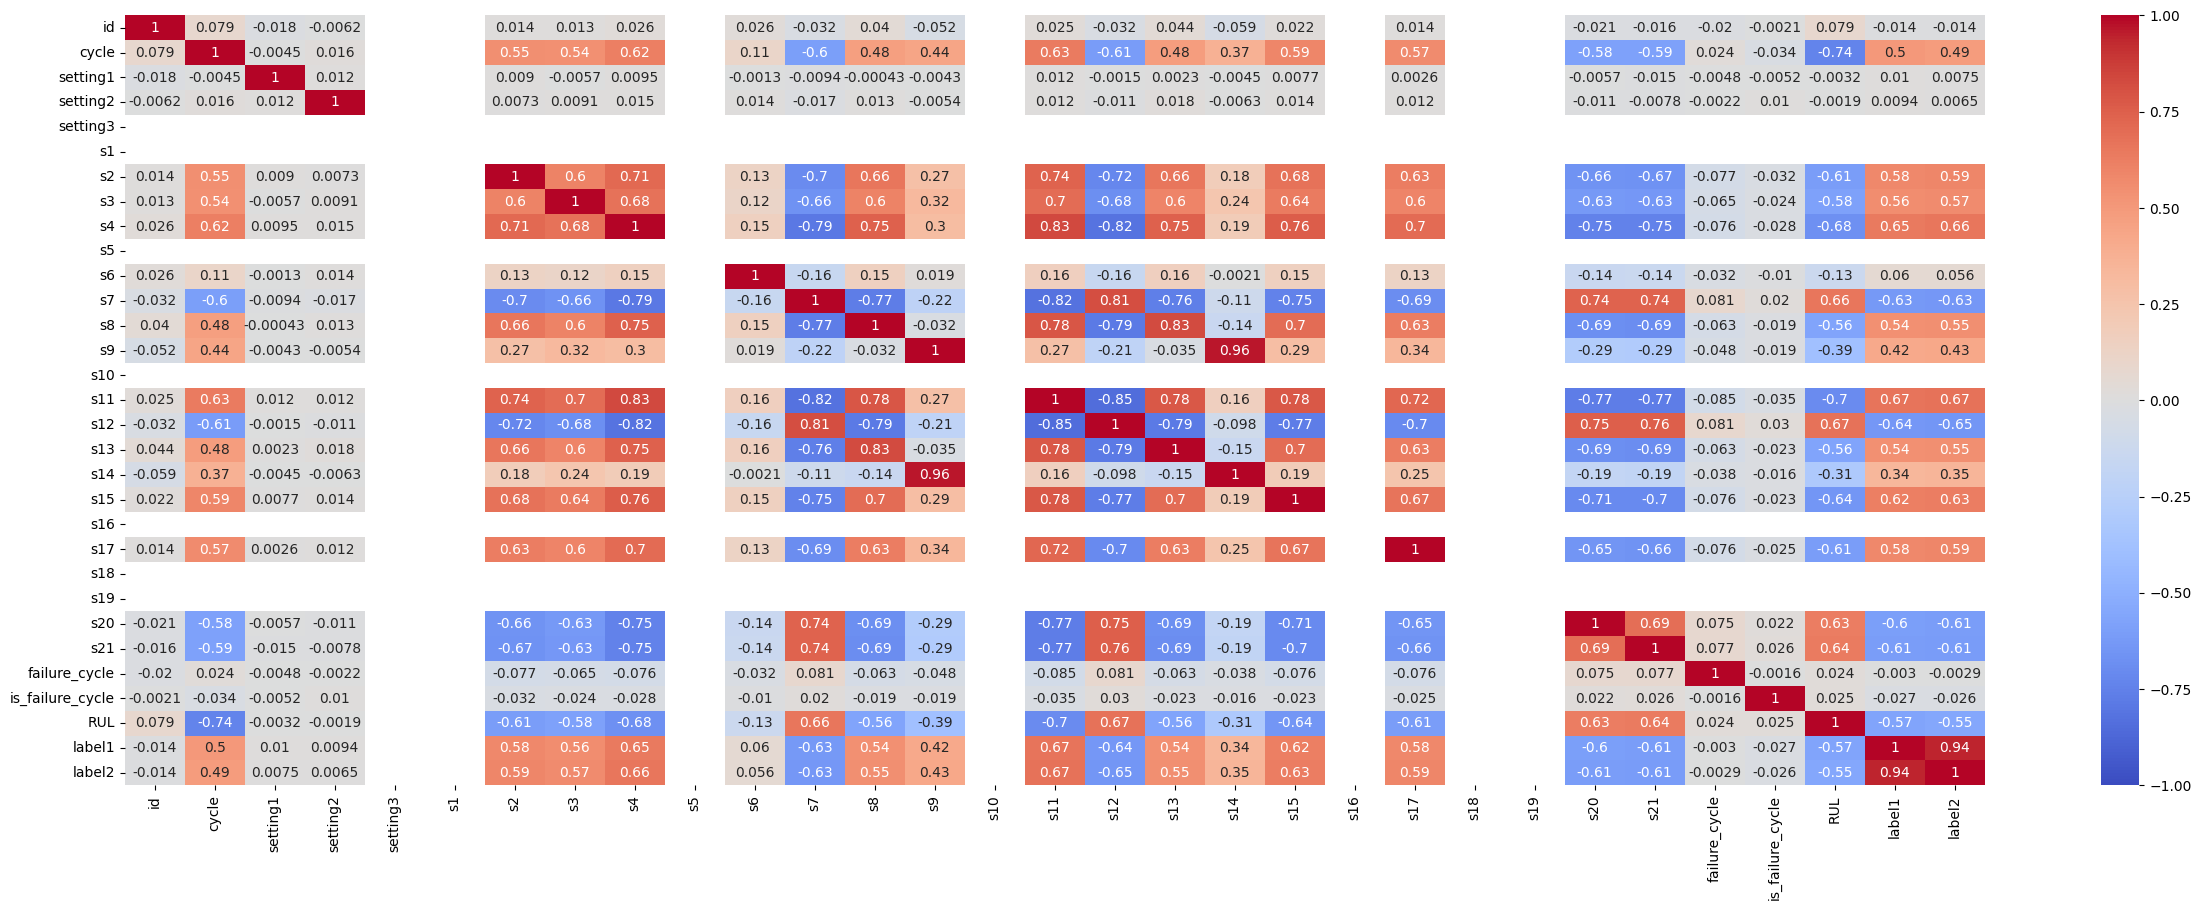

In [237]:
plt.figure(figsize=[30,10])
sns.heatmap (df_norma.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

Como ya se ha apuntado anteriormente se eliminaran las columnas:
- que tienen valores constantes: setting3, s1,s5,s10,s16,s18,s19.
- que tienen una correlación muy alta entre sí: s9 y se deja s14.
- variables que ya no son necesarias: failure_cycle, is_failure_cycle.
- variable con muy baja correlación con las posibles Target:s6


In [235]:
cols_a_borrar = ['setting1', 'setting2', 'setting3', 's1','s5', 's6','s9','s10','s16', 's18', 's19', 'failure_cycle','is_failure_cycle']
df_red = df_norma.drop(columns=cols_a_borrar)
df_red

id  cycle        s2        s3        s4        s7        s8       s11  \
0        1      1  0.183735  0.406802  0.309757  0.726248  0.242424  0.369048   
1        1      2  0.283133  0.453019  0.352633  0.628019  0.212121  0.380952   
2        1      3  0.343373  0.369523  0.370527  0.710145  0.272727  0.250000   
3        1      4  0.343373  0.256159  0.331195  0.740741  0.318182  0.166667   
4        1      5  0.349398  0.257467  0.404625  0.668277  0.242424  0.255952   
...    ...    ...       ...       ...       ...       ...       ...       ...   
20626  100    196  0.686747  0.587312  0.782917  0.254428  0.439394  0.726190   
20627  100    197  0.701807  0.729453  0.866475  0.162641  0.500000  0.708333   
20628  100    198  0.665663  0.684979  0.775321  0.175523  0.515152  0.738095   
20629  100    199  0.608434  0.746021  0.747468  0.133655  0.530303  0.916667   
20630  100    200  0.795181  0.639634  0.842167  0.151369  0.545455  0.803571   

            s12       s13       s14       s15       s17       s20       s21  \
0      0.633262  0.205882  0.199608  0.363986  0.333333  0.713178  0.724662   
1      0.765458  0.279412  0.162813  0.411312  0.333333  0.666667  0.731014   
2      0.795309  0.220588  0.171793  0.357445  0.166667  0.627907  0.621375   
3      0.889126  0.294118  0.174889  0.166603  0.333333  0.573643  0.662386   
4      0.746269  0.235294  0.174734  0.402078  0.416667  0.589147  0.704502   
...         ...       ...       ...       ...       ...       ...       ...   
20626  0.170576  0.558824  0.194344  0.656791  0.750000  0.271318  0.109500   
20627  0.211087  0.500000  0.188668  0.727203  0.583333  0.124031  0.366197   
20628  0.281450  0.529412  0.212148  0.922278  0.833333  0.232558  0.053991   
20629  0.208955  0.514706  0.203065  0.823394  0.583333  0.116279  0.234466   
20630  0.130064  0.558824  0.192951  0.687572  0.666667  0.178295  0.218172   

         RUL  label1  label2  
0      191.0       0       0  
1      190.0       0       0  
2      189.0       0       0  
3      188.0       0       0  
4      187.0       0       0  
...      ...     ...     ...  
20626    4.0       1       2  
20627    3.0       1       2  
20628    2.0       1       2  
20629    1.0       1       2  
20630    0.0       1       2  

[20631 rows x 18 columns]

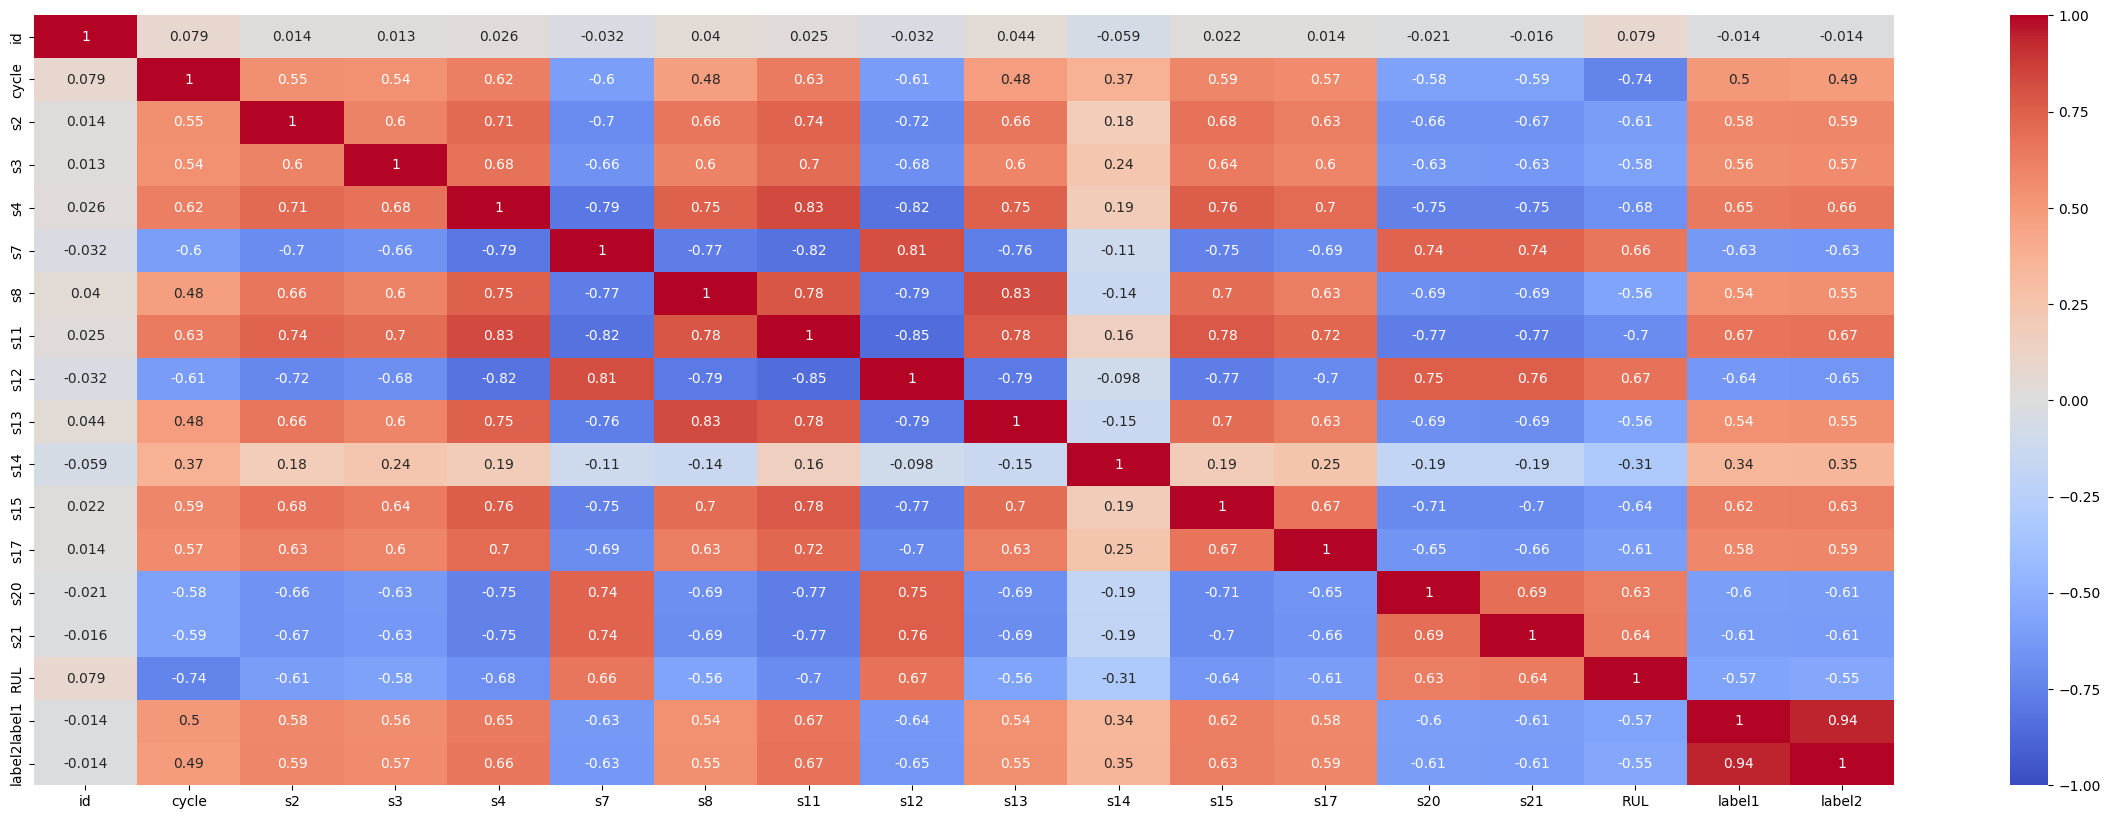

In [236]:
plt.figure(figsize=[30,10])
sns.heatmap (df_red.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

Las correlaciones de casi todas las variables se se han dejado son bastante grandes con las 3 posibles Targets.

Se guarda en un archivo CSV estos datos normalizados y limpios.

In [239]:
df_red.to_csv("../data/processed/datos_norm_limpios.csv", index=False)

# 10-POSIBILIDAD DE REDUCIR CICLOS OK PARA BALANCEAR DATOS

In [240]:
class_counts = df_red['label2'].value_counts()
class_counts

label2
0    17531
2     1600
1     1500
Name: count, dtype: int64

In [241]:
class_counts = df_red['label1'].value_counts()
class_counts

label1
0    17531
1     3100
Name: count, dtype: int64

Los datos disponibles son 17531 en modo OK, 1600 en modo MODERADO y 1500 en modo CRITICO.

Con el objetivo de mejorar las predicciones se probará a reducir en diferentes porcentajes el numero de ciclos OK, quitando los primeros ciclos de cada ID o motor.
Se hará de la siguiente manera para cada modelo.

In [242]:
df_red['cumcount'] = df_red.groupby('id').cumcount()
df_filtered = df_red[df_red['cumcount'] >= df_red['cumcount'].max() * 0.2]
df_filtered = df_filtered.drop(columns='cumcount')
df_filtered

id  cycle        s2        s3        s4        s7        s8       s11  \
73       1     74  0.527108  0.296708  0.324612  0.673108  0.257576  0.434524   
74       1     75  0.225904  0.245912  0.212188  0.603865  0.257576  0.220238   
75       1     76  0.301205  0.396119  0.281735  0.613527  0.181818  0.351190   
76       1     77  0.403614  0.332679  0.316003  0.766506  0.242424  0.333333   
77       1     78  0.234940  0.211903  0.368839  0.582931  0.272727  0.327381   
...    ...    ...       ...       ...       ...       ...       ...       ...   
20626  100    196  0.686747  0.587312  0.782917  0.254428  0.439394  0.726190   
20627  100    197  0.701807  0.729453  0.866475  0.162641  0.500000  0.708333   
20628  100    198  0.665663  0.684979  0.775321  0.175523  0.515152  0.738095   
20629  100    199  0.608434  0.746021  0.747468  0.133655  0.530303  0.916667   
20630  100    200  0.795181  0.639634  0.842167  0.151369  0.545455  0.803571   

            s12       s13       s14       s15       s17       s20       s21  \
73     0.759062  0.132353  0.168903  0.340900  0.333333  0.511628  0.673571   
74     0.656716  0.338235  0.155795  0.527895  0.333333  0.581395  0.632284   
75     0.616205  0.220588  0.188358  0.287418  0.166667  0.682171  0.757526   
76     0.620469  0.294118  0.182217  0.492882  0.416667  0.658915  0.525822   
77     0.765458  0.411765  0.175302  0.209311  0.333333  0.573643  0.627451   
...         ...       ...       ...       ...       ...       ...       ...   
20626  0.170576  0.558824  0.194344  0.656791  0.750000  0.271318  0.109500   
20627  0.211087  0.500000  0.188668  0.727203  0.583333  0.124031  0.366197   
20628  0.281450  0.529412  0.212148  0.922278  0.833333  0.232558  0.053991   
20629  0.208955  0.514706  0.203065  0.823394  0.583333  0.116279  0.234466   
20630  0.130064  0.558824  0.192951  0.687572  0.666667  0.178295  0.218172   

         RUL  label1  label2  
73     118.0       0       0  
74     117.0       0       0  
75     116.0       0       0  
76     115.0       0       0  
77     114.0       0       0  
...      ...     ...     ...  
20626    4.0       1       2  
20627    3.0       1       2  
20628    2.0       1       2  
20629    1.0       1       2  
20630    0.0       1       2  

[13331 rows x 18 columns]

In [243]:
class_counts = df_filtered['label2'].value_counts()
class_counts

label2
0    10231
2     1600
1     1500
Name: count, dtype: int64

Se ha reducido el numero de ciclos OK

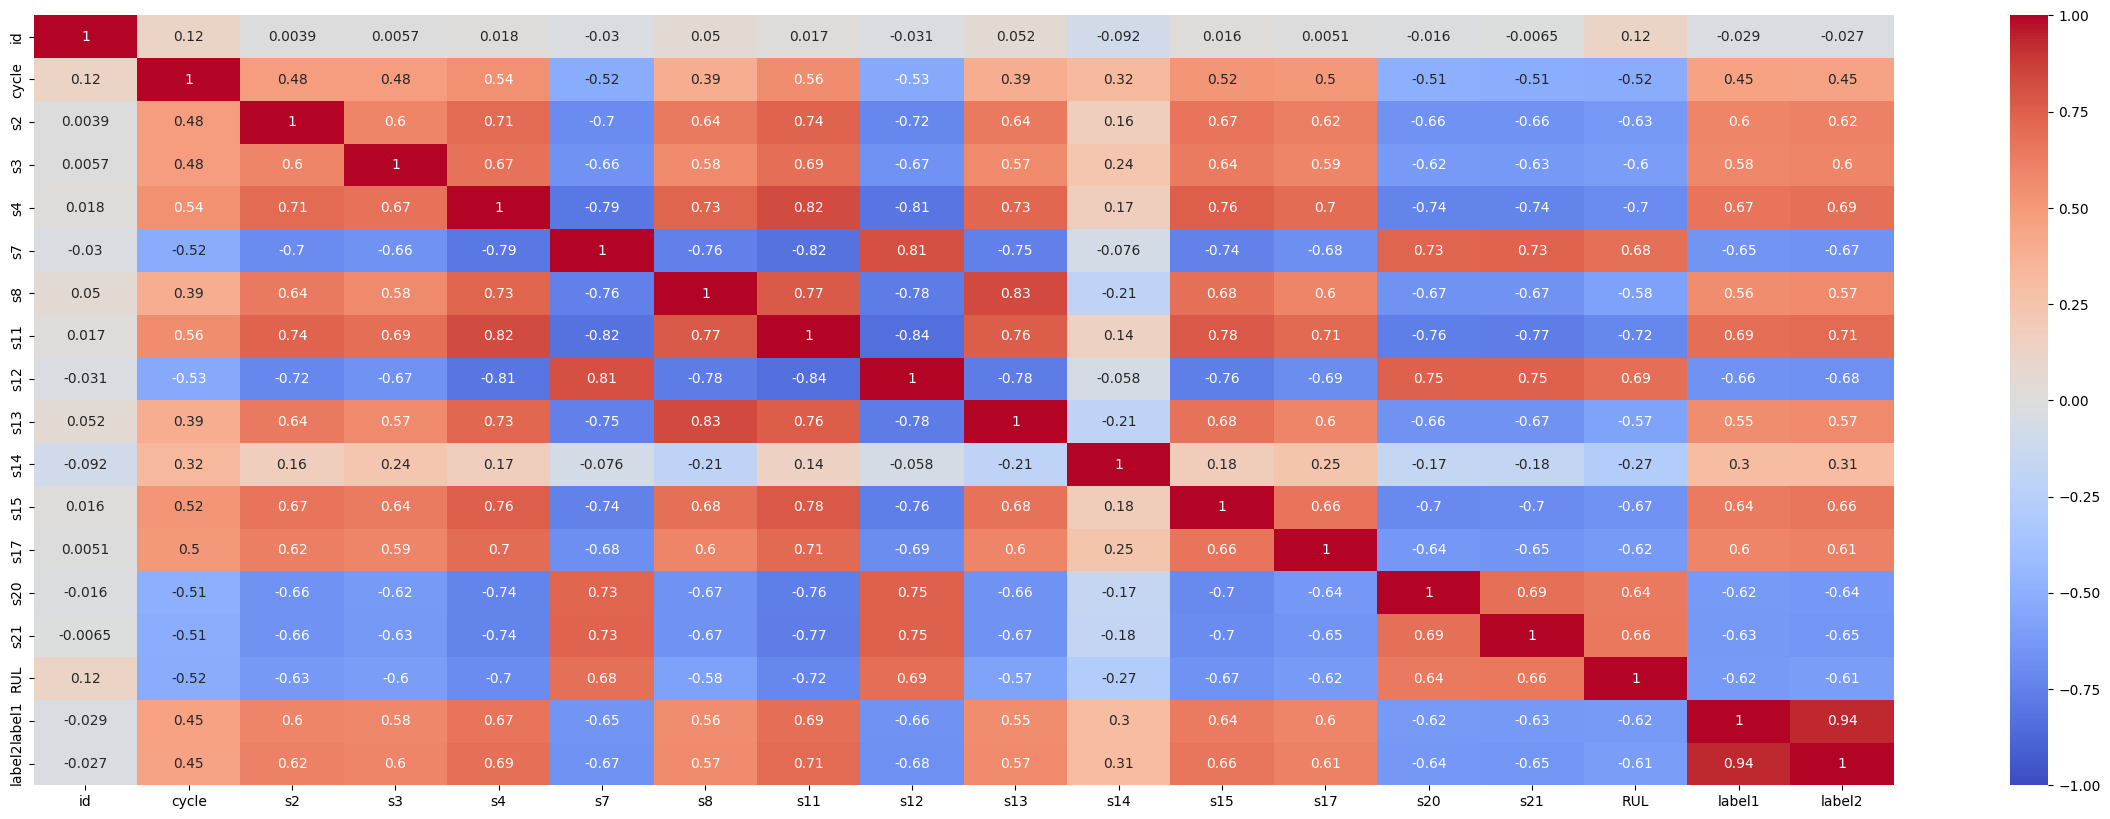

In [244]:
plt.figure(figsize=[30,10])
sns.heatmap (df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

# 11- SEPARACIÓN DE DATOS ENTRE TRAIN Y TEST

Esto se hará para cada modelo para poder decidir antes si se reduce el numero de ciclos OK.

In [256]:
X = df_filtered.drop(columns=['id', 'cycle', 'label1', 'label2', 'RUL'])
y = df_filtered['label2']

In [257]:
X

s2        s3        s4        s7        s8       s11       s12  \
73     0.527108  0.296708  0.324612  0.673108  0.257576  0.434524  0.759062   
74     0.225904  0.245912  0.212188  0.603865  0.257576  0.220238  0.656716   
75     0.301205  0.396119  0.281735  0.613527  0.181818  0.351190  0.616205   
76     0.403614  0.332679  0.316003  0.766506  0.242424  0.333333  0.620469   
77     0.234940  0.211903  0.368839  0.582931  0.272727  0.327381  0.765458   
...         ...       ...       ...       ...       ...       ...       ...   
20626  0.686747  0.587312  0.782917  0.254428  0.439394  0.726190  0.170576   
20627  0.701807  0.729453  0.866475  0.162641  0.500000  0.708333  0.211087   
20628  0.665663  0.684979  0.775321  0.175523  0.515152  0.738095  0.281450   
20629  0.608434  0.746021  0.747468  0.133655  0.530303  0.916667  0.208955   
20630  0.795181  0.639634  0.842167  0.151369  0.545455  0.803571  0.130064   

            s13       s14       s15       s17       s20       s21  
73     0.132353  0.168903  0.340900  0.333333  0.511628  0.673571  
74     0.338235  0.155795  0.527895  0.333333  0.581395  0.632284  
75     0.220588  0.188358  0.287418  0.166667  0.682171  0.757526  
76     0.294118  0.182217  0.492882  0.416667  0.658915  0.525822  
77     0.411765  0.175302  0.209311  0.333333  0.573643  0.627451  
...         ...       ...       ...       ...       ...       ...  
20626  0.558824  0.194344  0.656791  0.750000  0.271318  0.109500  
20627  0.500000  0.188668  0.727203  0.583333  0.124031  0.366197  
20628  0.529412  0.212148  0.922278  0.833333  0.232558  0.053991  
20629  0.514706  0.203065  0.823394  0.583333  0.116279  0.234466  
20630  0.558824  0.192951  0.687572  0.666667  0.178295  0.218172  

[13331 rows x 13 columns]

In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)

(10664, 13)
(2667, 13)


# 12-GUARDADO DE DATOS TRAIN Y TEST EN .CSV

In [259]:
# Reconstruir el DataFrame de entrenamiento uniendo X_train y y_train
train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

# Guardar en CSV
train_df.to_csv('../data/train/train.csv', index=False)
train_df


s2        s3        s4        s7        s8       s11       s12  \
0      0.481928  0.321343  0.471472  0.586151  0.318182  0.446429  0.654584   
1      0.436747  0.364508  0.408508  0.484702  0.318182  0.392857  0.663113   
2      0.466867  0.323741  0.467252  0.465378  0.424242  0.511905  0.545842   
3      0.250000  0.384347  0.381837  0.811594  0.136364  0.285714  0.825160   
4      0.623494  0.570525  0.712694  0.494364  0.303030  0.690476  0.567164   
...         ...       ...       ...       ...       ...       ...       ...   
10659  0.427711  0.400044  0.307562  0.695652  0.333333  0.369048  0.611940   
10660  0.406627  0.411598  0.432140  0.573269  0.303030  0.380952  0.573561   
10661  0.527108  0.318509  0.539500  0.410628  0.318182  0.553571  0.443497   
10662  0.575301  0.737083  0.720797  0.191626  0.454545  0.625000  0.364606   
10663  0.286145  0.417702  0.347063  0.814815  0.196970  0.250000  0.750533   

            s13       s14       s15       s17       s20       s21  label2  
0      0.264706  0.232687  0.460177  0.333333  0.550388  0.614057       0  
1      0.352941  0.194189  0.507118  0.333333  0.441860  0.674676       0  
2      0.455882  0.104139  0.438630  0.333333  0.395349  0.513670       0  
3      0.132353  0.256425  0.242786  0.416667  0.589147  0.664457       0  
4      0.382353  0.568635  0.565987  0.583333  0.310078  0.362745       2  
...         ...       ...       ...       ...       ...       ...     ...  
10659  0.352941  0.183765  0.402078  0.333333  0.705426  0.631317       0  
10660  0.294118  0.247136  0.411312  0.416667  0.612403  0.722729       0  
10661  0.352941  0.214367  0.552905  0.416667  0.480620  0.472798       0  
10662  0.573529  0.116524  0.689881  0.750000  0.333333  0.267882       2  
10663  0.220588  0.216018  0.283186  0.416667  0.651163  0.745374       0  

[10664 rows x 14 columns]

In [260]:
# Reconstruir el DataFrame de entrenamiento uniendo X_train y y_train
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Guardar en CSV
test_df.to_csv('../data/test/test.csv', index=False)
test_df


s2        s3        s4        s7        s8       s11       s12  \
0     0.406627  0.409200  0.379980  0.534622  0.348485  0.446429  0.599147   
1     0.379518  0.476564  0.616475  0.465378  0.409091  0.440476  0.368870   
2     0.457831  0.367997  0.309757  0.599034  0.212121  0.422619  0.637527   
3     0.524096  0.572923  0.478731  0.495974  0.287879  0.440476  0.616205   
4     0.439759  0.535426  0.411715  0.566828  0.287879  0.517857  0.490405   
...        ...       ...       ...       ...       ...       ...       ...   
2662  0.457831  0.417048  0.495611  0.510467  0.393939  0.404762  0.520256   
2663  0.394578  0.459996  0.485989  0.711755  0.287879  0.380952  0.579957   
2664  0.493976  0.493569  0.468940  0.454106  0.454545  0.517857  0.390192   
2665  0.569277  0.496839  0.566340  0.494364  0.363636  0.375000  0.490405   
2666  0.563253  0.610639  0.530722  0.425121  0.242424  0.511905  0.385928   

           s13       s14       s15       s17       s20       s21  label2  
0     0.470588  0.157343  0.535975  0.500000  0.550388  0.501933       0  
1     0.397059  0.145268  0.529050  0.416667  0.356589  0.558409       0  
2     0.264706  0.231809  0.418238  0.333333  0.620155  0.513118       0  
3     0.323529  0.203014  0.555214  0.416667  0.612403  0.485915       0  
4     0.397059  0.184591  0.457868  0.500000  0.503876  0.343275       0  
...        ...       ...       ...       ...       ...       ...     ...  
2662  0.382353  0.149190  0.404386  0.333333  0.573643  0.477492       0  
2663  0.279412  0.296109  0.547518  0.333333  0.558140  0.681442       0  
2664  0.455882  0.171586  0.580608  0.583333  0.348837  0.499862       0  
2665  0.426471  0.209258  0.485956  0.333333  0.426357  0.441591       0  
2666  0.338235  0.412065  0.611389  0.583333  0.418605  0.534935       0  

[2667 rows x 14 columns]

In [261]:
class_counts_train = train_df['label2'].value_counts()
class_counts_train

label2
0    8192
2    1299
1    1173
Name: count, dtype: int64

In [262]:
class_counts_test = test_df['label2'].value_counts()
class_counts_test

label2
0    2039
1     327
2     301
Name: count, dtype: int64

# 13- MODELOS PREDICTIVOS

Los modelos predictivos se realizarán en Notebooks separados